# Challenge DADOS Alura Ca$h - Agosto 2022

----

**Boas-vindas!**

Você foi contratado(a) como pessoa cientista de dados para trabalhar em um banco digital internacional chamado **Alura Cash**. Na primeira reunião do seu novo trabalho, a diretoria financeira informa que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos. Portanto, é solicitada uma solução para que seja possível diminuir as perdas financeiras por conta de pessoas mutuarias que não quitam suas dívidas.

Como cientista de dados, você sugere um estudo das informações financeiras e de solicitação de empréstimo para encontrar padrões que possam indicar uma possível inadimplência.

Desse modo, você solicita um conjunto de dados que contenha as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuaria é inadimplente ou não. Com esses dados, você sabe que consegue modelar um classificador capaz de encontrar potenciais clientes inadimplentes e solucionar o problema do Alura Cash.

Por fim, você vai utilizar o **GitHub** e desenvolver um **portfólio** focado em Data Science, Data Analytics e Machine Learning.

# 1. Importações

In [1]:
import pandas as pd
import numpy as np

# 2. Datasets

## 2.1 Leitura do arquivo CSV

In [2]:
uri = 'https://raw.githubusercontent.com/tarik-pomim/challenge_dados_082022/main/dados.csv'

In [3]:
dataset = pd.read_csv(uri)

## 2.2 Avaliações iniciais do dataset

In [4]:
dataset.sample(10)

,person_id,loan_id,cb_id,person_id.1,person_age,person_income,person_home_ownership,person_emp_length,loan_id.1,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_id.1,cb_person_default_on_file,cb_person_cred_hist_length
6357,g3chevBY-b4mh,7Mo3Rwtz-TusQ,3Z8Bu0Uh-Skfr,g3chevBY-b4mh,24.0,120000.0,Rent,1.0,7Mo3Rwtz-TusQ,Venture,B,24000.0,12.69,0.0,0.20,3Z8Bu0Uh-Skfr,N,4.0
33123,eKM0OfDQ-0X7i,2IHngAri-UjoL,CKtckxtS-Mx4Z,eKM0OfDQ-0X7i,23.0,54000.0,Mortgage,5.0,2IHngAri-UjoL,Medical,C,5200.0,13.99,1.0,0.10,CKtckxtS-Mx4Z,N,3.0
6392,IICcmGDK-zrSI,2snj3BeG-u1ty,ouh3ea7U-vi2a,IICcmGDK-zrSI,22.0,45600.0,Mortgage,5.0,2snj3BeG-u1ty,Venture,B,9500.0,10.38,0.0,0.21,ouh3ea7U-vi2a,N,2.0
22315,WiRlDDFb-9Q4i,xXmBe2vZ-ds4x,iR1KHQyn-Erzs,WiRlDDFb-9Q4i,39.0,48279.0,Own,7.0,xXmBe2vZ-ds4x,Venture,C,4800.0,13.98,0.0,0.10,iR1KHQyn-Erzs,N,13.0
27082,ejkrP5nR-o7rU,ixuIa2uK-xyCz,2a8B3HNL-QDom,ejkrP5nR-o7rU,25.0,50000.0,Mortgage,NaN,ixuIa2uK-xyCz,NaN,E,12000.0,5.79,0.0,0.15,2a8B3HNL-QDom,N,3.0
18198,SCJYZJ7T-58my,jqIjQTIB-wG6G,4nKKsdX5-fTSf,SCJYZJ7T-58my,34.0,69000.0,Rent,0.0,jqIjQTIB-wG6G,Venture,D,12800.0,15.70,1.0,0.19,4nKKsdX5-fTSf,N,5.0
814,wZAjdCY4-2cBB,IAn4Pdng-jCwy,6O5WySBy-Sfse,wZAjdCY4-2cBB,45.0,110000.0,Mortgage,5.0,IAn4Pdng-jCwy,Personal,B,20000.0,11.11,0.0,0.18,6O5WySBy-Sfse,N,16.0
32076,zTn1j1aZ-SMwY,TkKZ9tfH-63ya,mArRvvNa-cEgl,zTn1j1aZ-SMwY,NaN,120000.0,Own,3.0,TkKZ9tfH-63ya,Education,A,5000.0,10.62,0.0,NaN,mArRvvNa-cEgl,N,2.0
6826,sg9SBspM-RiZ0,ns2WuwOl-LAa1,8yWQIR2k-743r,sg9SBspM-RiZ0,25.0,24000.0,Rent,4.0,ns2WuwOl-LAa1,Medical,D,2000.0,16.59,0.0,0.08,8yWQIR2k-743r,N,2.0
12763,2yXd5d4F-ze3a,RlOQHJJK-oOFz,4rKz2iC7-9IqZ,2yXd5d4F-ze3a,27.0,62000.0,Mortgage,2.0,RlOQHJJK-oOFz,Homeimprovement,A,5000.0,5.42,0.0,0.08,4rKz2iC7-9IqZ,N,5.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_id                   34485 non-null  object 
 1   loan_id                     34501 non-null  object 
 2   cb_id                       34501 non-null  object 
 3   person_id.1                 34485 non-null  object 
 4   person_age                  34177 non-null  float64
 5   person_income               34162 non-null  float64
 6   person_home_ownership       34170 non-null  object 
 7   person_emp_length           33247 non-null  float64
 8   loan_id.1                   34501 non-null  object 
 9   loan_intent                 34186 non-null  object 
 10  loan_grade                  34188 non-null  object 
 11  loan_amnt                   34170 non-null  float64
 12  loan_int_rate               30871 non-null  float64
 13  loan_status                 341

## 2.3 Remoção de features redundantes

In [6]:
dataset.drop(['person_id.1', 'loan_id.1', 'cb_id.1'], axis=1, inplace=True)

In [7]:
dataset.head()

,person_id,loan_id,cb_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,84O7kuhy-aUlK,l3HT4gg4-bwKk,kOrNQkl9-NMjH,32.0,45489.0,NaN,13.0,Personal,C,3625.0,6.92,0.0,0.11,NaN,3.0
1,DlOwKWZ1-Yrp7,b2vBKv2M-2IYp,vEERJZi9-KXPU,26.0,50000.0,Mortgage,5.0,Homeimprovement,B,12375.0,10.99,0.0,0.25,N,3.0
2,01mYIc8o-5SsX,zzGGi9ec-u2LF,2l0WvCkT-vCj9,22.0,45000.0,Rent,3.0,Venture,B,5000.0,12.42,0.0,0.11,N,2.0
3,pJsBSXRA-8H5b,nhLomTZL-MWm8,Hb4ocXfC-rg5W,26.0,155142.0,Mortgage,6.0,Homeimprovement,D,23000.0,18.25,0.0,0.15,N,2.0
4,nf2cYR8g-MgSp,gp7W8s0h-4AkX,9MX3jpeX-FNdL,24.0,49232.0,Rent,8.0,Education,A,8500.0,6.54,0.0,0.17,N,4.0


## 2.4 Renomeando colunas para português

In [8]:
colunas_PtBr = {
    'person_id' : 'id_solicitante',
    'loan_id' : 'id_emprestimo',
    'cb_id' : 'id_historico',
    'person_age' : 'idade',
    'person_income' : 'salario_anual',
    'person_home_ownership' : 'situacao_imovel',
    'person_emp_length' : 'anos_empregado',
    'loan_intent' : 'motivo_emprestimo',
    'loan_grade' : 'pontuacao_emprestimo',
    'loan_amnt' : 'total_a_emprestar',
    'loan_int_rate' : 'juros',
    'loan_status' : 'possibilidade_inadimplencia',
    'loan_percent_income' : 'percentual_emprestimo_renda',
    'cb_person_default_on_file' : 'ja_foi_inadimplente',
    'cb_person_cred_hist_length' : 'anos_de_credito'
}

dataset.rename(mapper = colunas_PtBr, axis = 1, inplace = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_solicitante               34485 non-null  object 
 1   id_emprestimo                34501 non-null  object 
 2   id_historico                 34501 non-null  object 
 3   idade                        34177 non-null  float64
 4   salario_anual                34162 non-null  float64
 5   situacao_imovel              34170 non-null  object 
 6   anos_empregado               33247 non-null  float64
 7   motivo_emprestimo            34186 non-null  object 
 8   pontuacao_emprestimo         34188 non-null  object 
 9   total_a_emprestar            34170 non-null  float64
 10  juros                        30871 non-null  float64
 11  possibilidade_inadimplencia  34158 non-null  float64
 12  percentual_emprestimo_renda  34182 non-null  float64
 13  ja_foi_inadimple

# 3. Dicionário de dados

## 3.1 Original

| Feature | Característica |
| --- | --- |
|`person_id`|ID da pessoa solicitante|
|`loan_id`|ID da solicitação de empréstico de cada solicitante|
|`cb_id`|ID do histórico de cada solicitante|
| `person_age` | Idade da pessoa - em anos - que solicita empréstimo |
| `person_income` | Salário anual da pessoa solicitante |
| `person_home_ownership` | Situação da propriedade que a pessoa possui: *Alugada* (`Rent`), *Própria* (`Own`), *Hipotecada* (`Mortgage`) e *Outros casos* (`Other`) |
| `person_emp_length` | Tempo - em anos - que a pessoa trabalhou |
| `loan_intent` | Motivo do empréstimo: *Pessoal* (`Personal`), *Educativo* (`Education`), *Médico* (`Medical`), *Empreendimento* (`Venture`), *Melhora do lar* (`Homeimprovement`), *Pagamento de débitos* (`Debtconsolidation`) |
| `loan_grade` | Pontuação de empréstimos, por nível variando de `A` a `G` |
| `loan_amnt` | Valor total do empréstimo solicitado |
| `loan_int_rate` | Taxa de juros |
| `loan_status` | Possibilidade de inadimplência |
| `loan_percent_income` | Renda percentual entre o *valor total do empréstimo* e o *salário anual* |
| `cb_person_default_on_file` | Indica se a pessoa já foi inadimplente: sim (`Y`,`YES`) e não (`N`,`NO`) |
| `cb_person_cred_hist_length` | Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito |

## 3.2 Português

| Feature | Característica |
| --- | --- |
|`id_solicitante`|ID da pessoa solicitante|
|`id_emprestimo`|ID da solicitação de empréstico de cada solicitante|
|`id_historico`|ID do histórico de cada solicitante|
| `idade` | Idade da pessoa - em anos - que solicita empréstimo |
| `salario_anual` | Salário anual da pessoa solicitante |
| `situacao_imovel` | Situação da propriedade que a pessoa possui: *Alugada* (`Rent`), *Própria* (`Own`), *Hipotecada* (`Mortgage`) e *Outros casos* (`Other`) |
| `anos_empregado` | Tempo - em anos - que a pessoa trabalhou |
| `motivo_emprestimo` | Motivo do empréstimo: *Pessoal* (`Personal`), *Educativo* (`Education`), *Médico* (`Medical`), *Empreendimento* (`Venture`), *Melhora do lar* (`Homeimprovement`), *Pagamento de débitos* (`Debtconsolidation`) |
| `pontuacao_emprestimo` | Pontuação de empréstimos, por nível variando de `A` a `G` |
| `total_a_emprestar` | Valor total do empréstimo solicitado |
| `juros` | Taxa de juros |
| `possibilidade_inadimplencia` | Possibilidade de inadimplência |
| `percentual_emprestimo_renda` | Renda percentual entre o *valor total do empréstimo* e o *salário anual* |
| `ja_foi_inadimplente` | Indica se a pessoa já foi inadimplente: sim (`Y`,`YES`) e não (`N`,`NO`) |
| `anos_de_credito` | Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito |

# 4. Inconsistências

In [10]:
duplicados = dataset.duplicated()
print(f'O dataset contém {duplicados.sum()} informações duplicadas.')

O dataset contém 0 informações duplicadas.


In [11]:
nulos = dataset.isnull()
nulos.sum()

id_solicitante                   16
id_emprestimo                     0
id_historico                      0
idade                           324
salario_anual                   339
situacao_imovel                 331
anos_empregado                 1254
motivo_emprestimo               315
pontuacao_emprestimo            313
total_a_emprestar               331
juros                          3630
possibilidade_inadimplencia     343
percentual_emprestimo_renda     319
ja_foi_inadimplente             370
anos_de_credito                   4
dtype: int64

Várias features apresentam valores nulos (NaN), que carecem de tratamento.

In [12]:
brancos = dataset.eq(' ').sum() + dataset.eq('').sum()
brancos

id_solicitante                 0
id_emprestimo                  0
id_historico                   0
idade                          0
salario_anual                  0
situacao_imovel                0
anos_empregado                 0
motivo_emprestimo              0
pontuacao_emprestimo           0
total_a_emprestar              0
juros                          0
possibilidade_inadimplencia    0
percentual_emprestimo_renda    0
ja_foi_inadimplente            0
anos_de_credito                0
dtype: int64

Não foram encontrados valores ou espaços sem preenchimento no dataset.

# 5. Análise exploratória e limpeza dos dados

## 5.1 Criação de um novo dataset sem valores nulos

Removeremos todas as linhas que contém valores nulos e copiaremos para um novo dataset. Reorganizaremos o índice e faremos uma nova avaliação do novo dataset.

Aqui também faremos a remoção das colunas de identificação, pois não serão de muita valia.

In [13]:
dados = dataset.dropna().copy()
dados.drop(['id_solicitante', 'id_emprestimo', 'id_historico'], axis = 1, inplace = True)
dados.reset_index(drop=True, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        28638 non-null  float64
 1   salario_anual                28638 non-null  float64
 2   situacao_imovel              28638 non-null  object 
 3   anos_empregado               28638 non-null  float64
 4   motivo_emprestimo            28638 non-null  object 
 5   pontuacao_emprestimo         28638 non-null  object 
 6   total_a_emprestar            28638 non-null  float64
 7   juros                        28638 non-null  float64
 8   possibilidade_inadimplencia  28638 non-null  float64
 9   percentual_emprestimo_renda  28638 non-null  float64
 10  ja_foi_inadimplente          28638 non-null  object 
 11  anos_de_credito              28638 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.6+ MB


In [14]:
dados.sample(5)

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
9615,22.0,95000.0,Mortgage,0.0,Education,A,10400.0,5.42,0.0,0.11,N,4.0
3337,50.0,120000.0,Mortgage,0.0,Venture,D,5575.0,15.20,0.0,0.05,N,17.0
20854,24.0,24000.0,Rent,2.0,Venture,A,4000.0,8.59,0.0,0.17,N,3.0
7813,32.0,29500.0,Mortgage,4.0,Debtconsolidation,B,7000.0,10.00,1.0,0.24,N,9.0
19530,24.0,110000.0,Mortgage,5.0,Venture,B,15000.0,10.25,0.0,0.14,N,4.0


## 5.2 Ajuste do tipo dos dados

Transformando variáveis que estavam como ponto flutuante (float) em inteiro:

In [15]:
dados[['idade', 'anos_empregado', 'possibilidade_inadimplencia']] = dados[['idade', 'anos_empregado', 'possibilidade_inadimplencia']].astype({'idade' : 'int',
                                                                                                                                              'anos_empregado' : 'int',
                                                                                                                                              'possibilidade_inadimplencia' : 'int'},
                                                                                                                                             copy = False)

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        28638 non-null  int64  
 1   salario_anual                28638 non-null  float64
 2   situacao_imovel              28638 non-null  object 
 3   anos_empregado               28638 non-null  int64  
 4   motivo_emprestimo            28638 non-null  object 
 5   pontuacao_emprestimo         28638 non-null  object 
 6   total_a_emprestar            28638 non-null  float64
 7   juros                        28638 non-null  float64
 8   possibilidade_inadimplencia  28638 non-null  int64  
 9   percentual_emprestimo_renda  28638 non-null  float64
 10  ja_foi_inadimplente          28638 non-null  object 
 11  anos_de_credito              28638 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 2.6+ MB


Alinhando índice:

In [17]:
dados.reset_index(drop=True, inplace=True)

## 5.3 Análise exploratória das variáveis

### 5.3.1 Descrição completa do dataset:

Avaliação de algumas descrições das variáveis:

In [18]:
dados.describe()

,idade,salario_anual,anos_empregado,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,anos_de_credito
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### 5.3.2 Análise da variável: 'idade'

#### 5.3.2.1 Análises

Busca por valores únicos:

In [19]:
dados.idade.unique()

array([ 26,  22,  24,  23,  25,  28,  29,  35,  30,  27,  31,  41,  21,
        38,  33,  32,  34,  42,  40,  43,  36,  37,  39,  47,  46,  52,
        55,  50,  45,  44,  48,  53,  49,  54,  51,  64,  63,  56,  60,
        66,  62,  70,  57,  78,  58,  69,  20,  59,  80,  65,  67, 144,
        61, 123,  76,  73,  84])

In [20]:
dados.loc[dados['idade'] > 100]

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
11191,144,200000.0,Mortgage,4,Education,B,6000.0,11.86,0,0.03,N,2.0
12604,123,80004.0,Rent,2,Education,B,20400.0,10.25,0,0.25,N,3.0
24124,144,250000.0,Rent,4,Venture,C,4800.0,13.57,0,0.02,N,3.0
24279,144,6000000.0,Mortgage,12,Personal,C,5000.0,12.73,0,0.00,N,25.0


Foram encontrados mutuários com idades inconsistentes, removeremos estes dados do dataset:

In [21]:
dados.drop(dados.loc[dados['idade'] > 100].index, inplace=True)

In [22]:
dados.loc[dados['idade'] > 80]

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
26752,84,94800.0,Mortgage,2,Personal,A,10000.0,7.51,0,0.11,N,24.0


Com a remoção das linhas, agora o mutuário de maior idade tem 84 anos.

Distribuição dos mutuários por idade

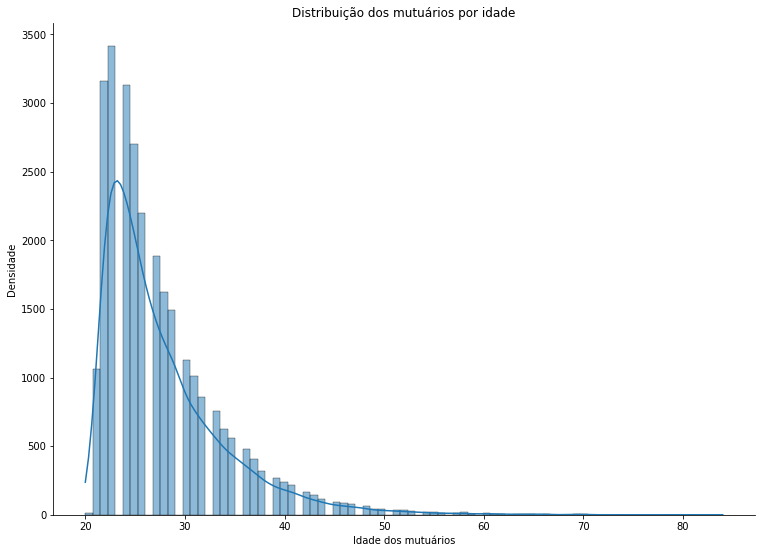

In [23]:
import seaborn as sns

ax = sns.displot(dados['idade'], kde= True, bins = 85)
ax.set(xlabel= 'Idade dos mutuários', ylabel= 'Densidade', title= 'Distribuição dos mutuários por idade')
ax.figure.set_size_inches(12,8)

#### 5.3.2.2 Conclusões

* Nota-se que a maior parte dos mutuários tem entre 20 e 30 anos de idade.
* O mutuário de idade mais avançada tem 84 anos.
* A idade mínima para solicitação de empréstimo é de 20 anos.

### 5.3.3 Análise da variável: 'salario_anual'

#### 5.3.3.1 Análises

Avaliaremos a variável 'salario_anual' utilizando duas visualizações.

Distribuição:

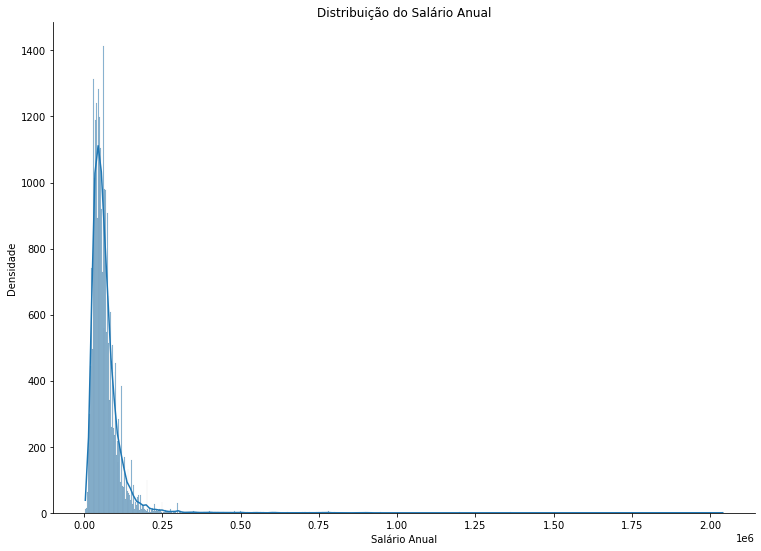

In [24]:
import seaborn as sns

ax = sns.displot(dados['salario_anual'], kde= True)
ax.set(xlabel= 'Salário Anual', ylabel= 'Densidade', title= 'Distribuição do Salário Anual')
ax.figure.set_size_inches(12,8)

Box-plot:

In [25]:
import plotly.express as px

fig = px.box(dados, 
             y="salario_anual",
             width=400,
             height=800,
             title = 'Salário Anual')
fig.show()

Através das visualizações gráficas, consegue-se traçar um valor adequado para remoção dos outliers:

In [26]:
dados.loc[dados['salario_anual'] > 800000]

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
1284,63,1782000.0,Rent,13,Education,C,12025.0,14.27,0,0.01,N,30.0
6183,36,1200000.0,Own,16,Medical,A,10000.0,6.54,0,0.01,N,11.0
11484,50,900000.0,Mortgage,11,Debtconsolidation,B,30000.0,12.69,0,0.03,N,15.0
13654,42,2039784.0,Rent,0,Venture,C,8450.0,12.29,0,0.00,Y,15.0
20002,37,900000.0,Mortgage,5,Personal,C,25000.0,12.87,0,0.03,Y,13.0
21437,47,1362000.0,Mortgage,9,Venture,A,6600.0,7.74,0,0.00,N,17.0
23388,58,900000.0,Rent,18,Debtconsolidation,C,19600.0,13.98,0,0.02,N,28.0
24608,32,1200000.0,Mortgage,1,Venture,A,12000.0,7.51,0,0.01,N,8.0
26835,44,1440000.0,Mortgage,7,Debtconsolidation,A,6400.0,7.40,0,0.00,N,15.0
28420,34,948000.0,Mortgage,18,Personal,B,2000.0,9.99,0,0.00,N,7.0


Removendo outliers do dataset:

In [27]:
dados.drop(dados[dados['salario_anual'] > 800000].index, inplace = True)

Reavaliando visualizações gráficas:

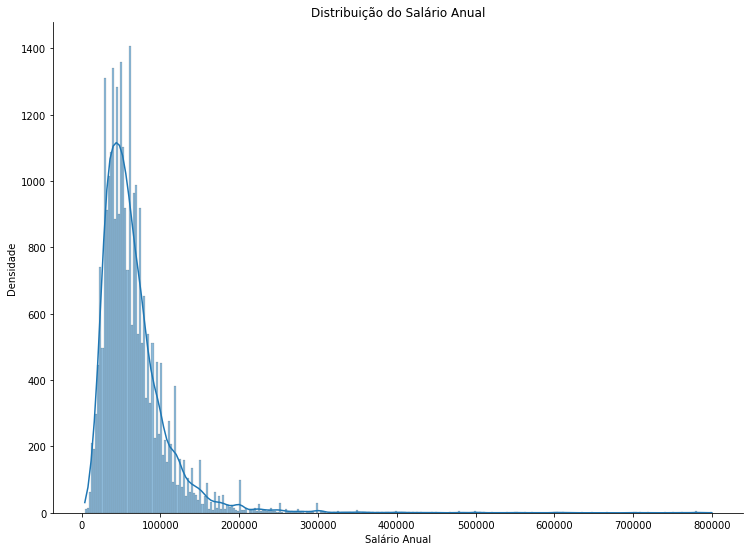

In [28]:
import seaborn as sns

ax = sns.displot(dados['salario_anual'], kde= True)
ax.set(xlabel= 'Salário Anual', ylabel= 'Densidade', title= 'Distribuição do Salário Anual')
ax.figure.set_size_inches(12,8)

In [29]:
import plotly.express as px

fig = px.box(dados, 
             y="salario_anual",
             width=400,
             height=800,
             title = 'Salário Anual')
fig.show()

#### 5.3.3.2 Conclusões

* Nota-se que a maior parte dos mutuários tem salário anual de, no máximo, 140mil.
* Após avaliação da distribuição dos dados, optou-se por um teto máximo de 800mil, onde valores acima disto foram removidos por serem considerados ouliers.

### 5.3.4 Análise da variável: 'situacao_imovel'

#### 5.3.4.1 Análises

In [30]:
dados['situacao_imovel'].unique()

array(['Mortgage', 'Rent', 'Own', 'Other'], dtype=object)

In [31]:
situacao_imoveis_porcentagens = dados['situacao_imovel'].value_counts(normalize = True) * 100
situacao_imoveis_porcentagens

Rent        50.817496
Mortgage    41.199693
Own          7.654416
Other        0.328396
Name: situacao_imovel, dtype: float64

In [32]:
print(f'{situacao_imoveis_porcentagens[0]:.2f}% dos mutuários moram de aluguel.')
print(f'{situacao_imoveis_porcentagens[1]:.2f}% dos mutuários possuem o imóvel financiado.')
print(f'{situacao_imoveis_porcentagens[2]:.2f}% dos mutuários são proprietários do imóvel.')

50.82% dos mutuários moram de aluguel.
41.20% dos mutuários possuem o imóvel financiado.
7.65% dos mutuários são proprietários do imóvel.


#### 5.3.4.2 Transformação numérica da variável

Transformaremos esta categorização para números:

In [33]:
tradudor_situacao_imovel = {'Mortgage': 0, 
                            'Rent' : 1,
                            'Own' : 2,
                            'Other' : 3}

dados['situacao_imovel'].replace(tradudor_situacao_imovel, inplace=True)

In [34]:
dados['situacao_imovel'].unique()

array([0, 1, 2, 3])

#### 5.3.4.3 Conclusões

* Esta variável representa a situação da propriedade que a pessoa possui.
* Variável 'situacao_imovel' apresenta boa integridade.
* 50.82% dos mutuários moram de aluguel.
* 41.20% dos mutuários possuem o imóvel financiado.
* 7.65% dos mutuários são proprietários do imóvel.

### 5.3.5 Análise da variável: 'anos_empregado'

#### 5.3.5.1 Análises

In [35]:
dados['anos_empregado'].unique()

array([  5,   3,   6,   8,   9,   0,   7,   1,   2,  14,  13,   4,  11,
        17,  12,  10,  18,  19,  21,  15,  16,  20,  27,  22, 123,  24,
        23,  28,  31,  41,  26,  38,  29,  25,  34,  30])

Variável 'anos_empregado' apresenta mutuários com excessiva quantidade de anos empregados:

In [36]:
dados.loc[dados['anos_empregado'] > 60]

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
1022,21,192000.0,0,123,Venture,A,20000.0,6.54,0,0.10,N,4.0
5760,22,59000.0,1,123,Personal,D,35000.0,16.02,1,0.59,Y,3.0


Removendo linhas com dados inconsistentes:

In [37]:
dados.drop(dados[dados['anos_empregado'] > 60].index, inplace = True)

In [38]:
dados['anos_empregado'].unique()

array([ 5,  3,  6,  8,  9,  0,  7,  1,  2, 14, 13,  4, 11, 17, 12, 10, 18,
       19, 21, 15, 16, 20, 27, 22, 24, 23, 28, 31, 41, 26, 38, 29, 25, 34,
       30])

Distribuição:

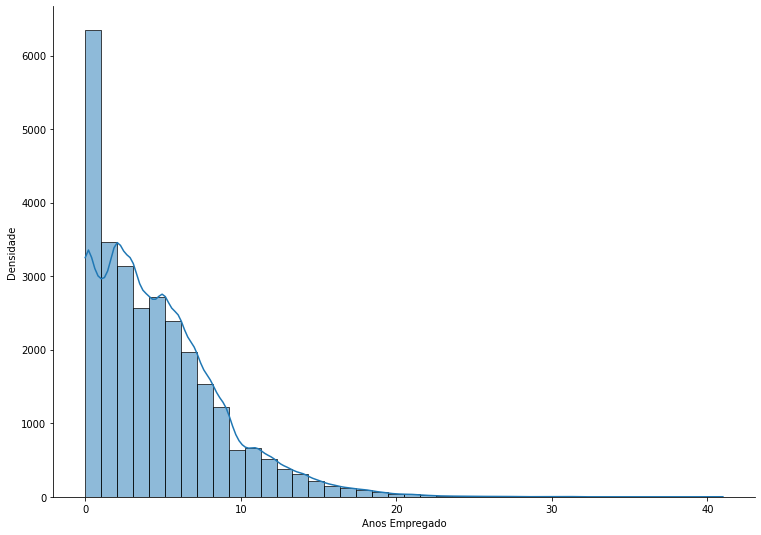

In [39]:
import seaborn as sns

ax = sns.displot(dados['anos_empregado'], kde= True, bins = 40)
ax.set(xlabel= 'Anos Empregado', ylabel= 'Densidade')
ax.figure.set_size_inches(12,8)

Distribuição em porcentagens:

In [40]:
anos_empregado_porcentagens = (dados['anos_empregado'].value_counts(normalize = True) * 100).round(2)

In [41]:
anos_empregado_porcentagens

0     12.95
2     12.12
3     10.95
5      9.48
1      9.23
4      8.98
6      8.36
7      6.88
8      5.36
9      4.28
11     2.31
10     2.20
12     1.81
13     1.32
14     1.07
15     0.74
16     0.53
17     0.40
18     0.33
19     0.21
20     0.13
21     0.12
22     0.06
23     0.03
24     0.03
25     0.03
27     0.02
31     0.01
26     0.01
28     0.01
30     0.01
41     0.00
38     0.00
29     0.00
34     0.00
Name: anos_empregado, dtype: float64

In [42]:
print(f'{anos_empregado_porcentagens[0] + anos_empregado_porcentagens[1]}% dos mutuários está empregado a no máximo 1 ano.')

22.18% dos mutuários está empregado a no máximo 1 ano.


#### 5.3.5.2 Conclusões

* Esta variável representa a quantidade de anos que o mutuário passou empregado até a data de solicitação do empréstimo.

* 22.18% dos mutuários está empregado à, no máximo, 1 ano.

### 5.3.6 Análise da variável: 'motivo_emprestimo'

#### 5.3.6.1 Análises

Conferindo dados preenchidos:

In [43]:
dados['motivo_emprestimo'].unique()

array(['Homeimprovement', 'Venture', 'Education', 'Personal',
       'Debtconsolidation', 'Medical'], dtype=object)

Distribuição dos dados em porcentagem:

In [44]:
motivo_emprestimo_porcentagens = (dados['motivo_emprestimo'].value_counts(normalize = True) * 100).round(2)
motivo_emprestimo_porcentagens

Education            19.92
Medical              18.49
Venture              17.46
Personal             17.03
Debtconsolidation    15.94
Homeimprovement      11.17
Name: motivo_emprestimo, dtype: float64

In [45]:
print(f'{motivo_emprestimo_porcentagens[0]}% dos mutuários solicitaram empréstimo para investir em educação.')
print(f'{motivo_emprestimo_porcentagens[1]}% dos mutuários solicitaram empréstimo por motivos médicos e/ou de saúde.')
print(f'{motivo_emprestimo_porcentagens[2]}% dos mutuários solicitaram empréstimo para investir em um empreendimento.')
print(f'{motivo_emprestimo_porcentagens[3]}% dos mutuários solicitaram empréstimo por motivos pessoais.')
print(f'{motivo_emprestimo_porcentagens[4]}% dos mutuários solicitaram empréstimo para pagar dívidas.')
print(f'{motivo_emprestimo_porcentagens[5]}% dos mutuários solicitaram empréstimo para reformar a casa.')

19.92% dos mutuários solicitaram empréstimo para investir em educação.
18.49% dos mutuários solicitaram empréstimo por motivos médicos e/ou de saúde.
17.46% dos mutuários solicitaram empréstimo para investir em um empreendimento.
17.03% dos mutuários solicitaram empréstimo por motivos pessoais.
15.94% dos mutuários solicitaram empréstimo para pagar dívidas.
11.17% dos mutuários solicitaram empréstimo para reformar a casa.


#### 5.3.6.2 Transformação numérica da variável

Transformaremos esta categorização para números:

In [46]:
tradudor_motivo_emprestimo = {'Homeimprovement': 0, 
                              'Venture' : 1,
                              'Education' : 2,
                              'Personal' : 3,
                              'Debtconsolidation' : 4,
                              'Medical' : 5}

dados['motivo_emprestimo'].replace(tradudor_motivo_emprestimo, inplace=True)

In [47]:
dados['motivo_emprestimo'].unique()

array([0, 1, 2, 3, 4, 5])

#### 5.3.6.3 Conclusões

* Variável 'motivo_emprestimo' apresenta boa integridade.
* 38.41% dos mutuários solicitaram empréstimo por motivos educacionais ou de saúde.



### 5.3.7 Análise da variável: 'pontuacao_emprestimo'

#### 5.3.7.1 Análises

Conferindo dados preenchidos:

In [48]:
dados['pontuacao_emprestimo'].unique()

array(['B', 'D', 'A', 'C', 'E', 'F', 'G'], dtype=object)

Distribuição dos dados em porcentagem:

In [49]:
pontuacao_emprestimo_porcentagens = (dados['pontuacao_emprestimo'].value_counts(normalize = True) * 100).round(2)
pontuacao_emprestimo_porcentagens

A    32.83
B    31.96
C    19.89
D    11.34
E     3.04
F     0.73
G     0.21
Name: pontuacao_emprestimo, dtype: float64

In [50]:
print(f'{pontuacao_emprestimo_porcentagens[0] + pontuacao_emprestimo_porcentagens[1]:.2f}% dos mutuários tem avaliação A ou B.')

64.79% dos mutuários tem avaliação A ou B.


#### 5.3.7.2 Transformação numérica da variável

Transformaremos esta categorização para números:

In [51]:
tradudor_pontuacao_emprestimo = {'A': 0,
                                 'B' : 1,
                                 'C' : 2,
                                 'D' : 3,
                                 'E' : 4,
                                 'F' : 5,
                                 'G' : 6}

dados['pontuacao_emprestimo'].replace(tradudor_pontuacao_emprestimo, inplace=True)

In [52]:
dados['pontuacao_emprestimo'].unique()

array([1, 3, 0, 2, 4, 5, 6])

#### 5.3.7.3 Conclusões

* Variável 'pontuacao_emprestimo' apresenta boa integridade.
* 64.79% dos mutuários tem avaliação A ou B.

### 5.3.8 Análise da variável: 'total_a_emprestar'

#### 5.3.8.1 Análises

Inicialmente, plotaremos um gráfico de distribuição agrupados em faixas de $500:

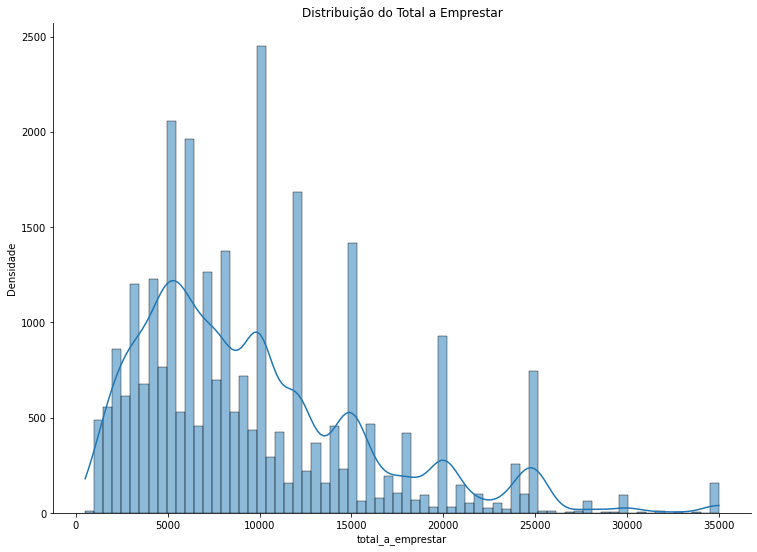

In [53]:
import seaborn as sns

ax = sns.displot(dados['total_a_emprestar'], kde= True, bins = 70)
ax.set(xlabel= 'total_a_emprestar', ylabel= 'Densidade', title= 'Distribuição do Total a Emprestar')
ax.figure.set_size_inches(12,8)

#### 5.3.8.2 Conclusões

* Variavel 'total_a_emprestar' apresenta boa integridade.
* Observa-se que as faixas de valor de maior interesse para se tomar emprestado são as múltiplos de 5: 5mil, 10mil, 15mil, 20mil, 25mil e 35mil.
* Nota-se, também, que valores abaixo de 10mil são mais propensos à ajustes na faixa de 1mil.
* Um destaque especial está nas faixas de 5mil e 6mil, que apresentam densidade próxima, não observada em faixas superiores.
* O valor mais comum para se tomar emprestado é de 10mil.

### 5.3.9 Análise da variável: 'juros'

#### 5.3.9.1 Análise

Distribuição visual das taxas de juros:

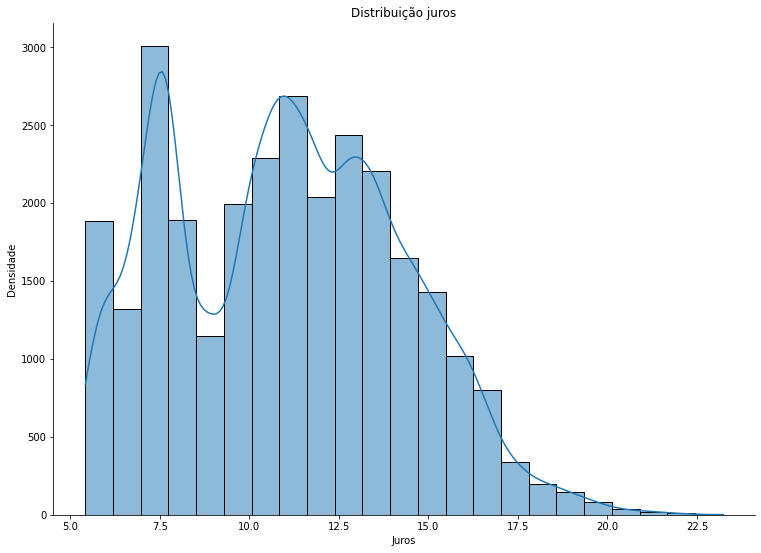

In [54]:
import seaborn as sns

ax = sns.displot(dados['juros'], kde= True, bins = 23)
ax.set(xlabel= 'Juros', ylabel= 'Densidade', title= 'Distribuição juros')
ax.figure.set_size_inches(12,8)

Distribuição, em porcentagem, de cada faixa da taxa de juros:

In [55]:
intervalos_de_juros = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
dados['juros'].value_counts(bins=intervalos_de_juros, sort=True, normalize=True).round(2) * 100 

(7.0, 8.0]      14.0
(11.0, 12.0]    12.0
(10.0, 11.0]    11.0
(13.0, 14.0]    10.0
(12.0, 13.0]     9.0
(6.0, 7.0]       8.0
(9.0, 10.0]      7.0
(14.0, 15.0]     7.0
(15.0, 16.0]     6.0
(8.0, 9.0]       5.0
(4.999, 6.0]     4.0
(16.0, 17.0]     3.0
Name: juros, dtype: float64

#### 5.3.9.2 Conclusões

* Variável 'juros' apresenta boa integridade.
* A faixa de juros mais comum é de 7% à 8%, com 14% dos mutuários pagando juros nesta faixa.
* 47% dos mutuários pagam entre 7% e 14% de juros.


### 5.3.10 Análise da variável: 'possibilidade_inadimplencia'

#### 5.3.10.1 Análises

In [56]:
dados['possibilidade_inadimplencia'].unique()

array([0, 1])

In [57]:
possibilidade_inadimplencia_porcentagens = (dados['possibilidade_inadimplencia'].value_counts(normalize = True) * 100).round(2)
possibilidade_inadimplencia_porcentagens

0    78.33
1    21.67
Name: possibilidade_inadimplencia, dtype: float64

#### 5.3.10.2 Conclusões

* Variável 'possibilidade_inadimplencia' apresenta boa integridade e já está convertida para valores numéricos binários.

* O dataset apresenta 78.33% de valores 0, ou seja, possíveis adimplentes.
* O dataset apresente 21.67% de valores 1, ou seja, possíveis inadimplentes.

### 5.3.11 Análise da variável: 'percentual_emprestimo_renda'

#### 5.3.11.1 Análises

Avaliando valores únicos da variável:

In [58]:
dados['percentual_emprestimo_renda'].unique()

array([0.25, 0.11, 0.15, 0.17, 0.08, 0.07, 0.31, 0.28, 0.22, 0.44, 0.14,
       0.04, 0.26, 0.1 , 0.12, 0.24, 0.09, 0.06, 0.18, 0.03, 0.16, 0.29,
       0.02, 0.33, 0.3 , 0.13, 0.19, 0.38, 0.47, 0.01, 0.2 , 0.23, 0.37,
       0.39, 0.53, 0.05, 0.27, 0.21, 0.4 , 0.32, 0.36, 0.34, 0.45, 0.57,
       0.52, 0.51, 0.54, 0.42, 0.43, 0.5 , 0.35, 0.41, 0.46, 0.59, 0.48,
       0.49, 0.63, 0.67, 0.6 , 0.55, 0.56, 0.65, 0.7 , 0.68, 0.  , 0.71,
       0.58, 0.64, 0.83, 0.76, 0.72, 0.78, 0.61, 0.77, 0.62, 0.66, 0.69])

Distribuição visual da variável:

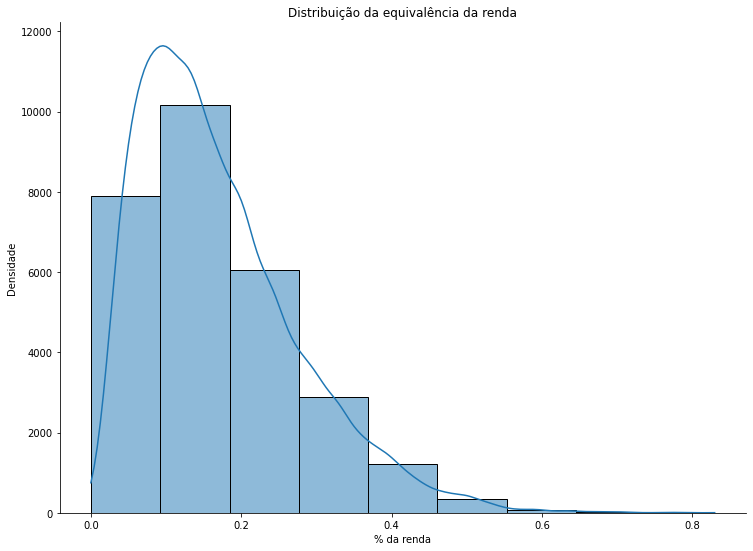

In [59]:
import seaborn as sns

ax = sns.displot(dados['percentual_emprestimo_renda'], kde= True, bins = 9)
ax.set(xlabel= '% da renda', ylabel= 'Densidade', title= 'Distribuição da equivalência da renda')
ax.figure.set_size_inches(12,8)

Distribuição em porcentagens:

In [60]:
intervalos_de_perc_renda = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dados['percentual_emprestimo_renda'].value_counts(bins=intervalos_de_perc_renda, sort=True, normalize=True).round(2) * 100

(0.1, 0.2]       37.0
(-0.001, 0.1]    32.0
(0.2, 0.3]       19.0
(0.3, 0.4]        8.0
(0.4, 0.5]        3.0
(0.5, 0.6]        1.0
(0.6, 0.7]        0.0
(0.7, 0.8]        0.0
(0.8, 0.9]        0.0
Name: percentual_emprestimo_renda, dtype: float64

#### 5.3.11.2 Conclusões

* A variável apresenta boa integridade de dados.
* 37% dos mutuários emprestam um valor equivalente de 1% a 2% da sua renda anual.
* 88% dos mutuários emprestam um valor equivalente de não mais que 3% da sua renda anual.

### 5.3.12 Análise da variável: 'ja_foi_inadimplente'

#### 5.3.12.1 Análises

In [61]:
dados['ja_foi_inadimplente'].unique()

array(['N', 'Y'], dtype=object)

In [62]:
inadimplentes = dados['ja_foi_inadimplente'].value_counts(normalize = True).round(2) * 100
inadimplentes

N    82.0
Y    18.0
Name: ja_foi_inadimplente, dtype: float64

#### 5.3.12.2 Transformação numérica da variável

In [63]:
tradutor_inadimplentes = {'N': 0, 
                          'Y' : 1}

dados['ja_foi_inadimplente'].replace(tradutor_inadimplentes, inplace=True)

In [64]:
dados['ja_foi_inadimplente'].unique()

array([0, 1])

#### 5.3.12.3 Conclusões

* A variável apresenta boa integridade de dados.
* 82% dos mutuários nunca foram inadimplentes.
* Esta será a variável-alvo para o modelo classificador.

### 5.3.13 Análise da variável: 'anos_de_credito'

#### 5.3.13.1 Análises

In [65]:
dados['anos_de_credito'].unique()

array([ 3.,  2.,  4., 10.,  8.,  9.,  6.,  7., 13.,  5., 11., 12., 15.,
       17., 16., 28., 27., 14., 26., 20., 24., 25., 18., 30., 22., 19.,
       21., 29., 23.])

In [66]:
dados['anos_de_credito'].value_counts(normalize = True).round(2) * 100

3.0     18.0
4.0     18.0
2.0     18.0
7.0      6.0
8.0      6.0
9.0      6.0
5.0      6.0
6.0      6.0
10.0     6.0
14.0     2.0
12.0     1.0
11.0     1.0
16.0     1.0
13.0     1.0
15.0     1.0
17.0     1.0
20.0     0.0
24.0     0.0
28.0     0.0
22.0     0.0
23.0     0.0
27.0     0.0
30.0     0.0
19.0     0.0
21.0     0.0
26.0     0.0
25.0     0.0
18.0     0.0
29.0     0.0
Name: anos_de_credito, dtype: float64

#### 5.3.13.2 Conclusões

* A variável apresenta boa integridade de dados.
* 54% dos mutuários obtiveram a primeira linha de crédito de 2 a 4 anos atrás.

### 5.3.14 Reorganizando índice:

In [67]:
dados.reset_index(drop=True, inplace=True)

In [68]:
dados.head()

,idade,salario_anual,situacao_imovel,anos_empregado,motivo_emprestimo,pontuacao_emprestimo,total_a_emprestar,juros,possibilidade_inadimplencia,percentual_emprestimo_renda,ja_foi_inadimplente,anos_de_credito
0,26,50000.0,0,5,0,1,12375.0,10.99,0,0.25,0,3.0
1,22,45000.0,1,3,1,1,5000.0,12.42,0,0.11,0,2.0
2,26,155142.0,0,6,0,3,23000.0,18.25,0,0.15,0,2.0
3,24,49232.0,1,8,2,0,8500.0,6.54,0,0.17,0,4.0
4,26,125000.0,1,6,1,0,10000.0,7.49,0,0.08,0,2.0


In [69]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28622 entries, 0 to 28621
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        28622 non-null  int64  
 1   salario_anual                28622 non-null  float64
 2   situacao_imovel              28622 non-null  int64  
 3   anos_empregado               28622 non-null  int64  
 4   motivo_emprestimo            28622 non-null  int64  
 5   pontuacao_emprestimo         28622 non-null  int64  
 6   total_a_emprestar            28622 non-null  float64
 7   juros                        28622 non-null  float64
 8   possibilidade_inadimplencia  28622 non-null  int64  
 9   percentual_emprestimo_renda  28622 non-null  float64
 10  ja_foi_inadimplente          28622 non-null  int64  
 11  anos_de_credito              28622 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 2.6 MB


## 5.4 Highlights da análise exploratória das variáveis

> **'idade':**
* Nota-se que a maior parte dos mutuários tem entre 20 e 30 anos de idade.
* O mutuário de idade mais avançada tem 84 anos.
* A idade mínima para solicitação de empréstimo é de 20 anos.

> **'salario_anual':**
* Nota-se que a maior parte dos mutuários tem salário anual de, no máximo, 140mil.
* Após avaliação da distribuição dos dados, optou-se por um teto máximo de 800mil, onde valores acima disto foram removidos por serem considerados ouliers.

> **'situacao_imovel':**
* Esta variável representa a situação da propriedade que o mutuário possui.
* 50.82% dos mutuários moram de aluguel.
* 41.20% dos mutuários possuem o imóvel financiado.
* 7.65% dos mutuários são proprietários do imóvel.

> **'anos_empregado':**
* Esta variável representa a quantidade de anos que o mutuário passou empregado até a data de solicitação do empréstimo.
* 22.18% dos mutuários está empregado à, no máximo, 1 ano.

> **'motivo_emprestimo':**
* 38.41% dos mutuários solicitaram empréstimo por motivos educacionais ou de saúde.

> **'pontuacao_emprestimo':**
* 64.79% dos mutuários tem avaliação A ou B.

> **'total_a_emprestar':**
* Observa-se que as faixas de valor de maior interesse para se tomar emprestado são as múltiplos de 5: 5mil, 10mil, 15mil, 20mil, 25mil e 35mil.
* Nota-se, também, que valores abaixo de 10mil são mais propensos à ajustes na faixa de 1mil.
* Um destaque especial está nas faixas de 5mil e 6mil, que apresentam densidade próxima, não observada em faixas superiores.
* O valor mais comum para se tomar emprestado é de 10mil.


> **'juros':**
* A faixa de juros mais comum é de 7% à 8%, com 14% dos mutuários pagando juros nesta faixa.
* 47% dos mutuários pagam entre 7% e 14% de juros.

> **'possibilidade_inadimplencia':**
* O dataset apresenta 78.33% de valores 0, ou seja, possíveis adimplentes.
* O dataset apresente 21.67% de valores 1, ou seja, possíveis inadimplentes.

> **'percentual_emprestimo_renda':**
* 37% dos mutuários emprestam um valor equivalente de 1% a 2% da sua renda anual.
* 88% dos mutuários emprestam um valor equivalente de não mais que 3% da sua renda anual.

> **'ja_foi_inadimplente':**
* 82% dos mutuários nunca foram inadimplentes.
* Esta é a variável-alvo do modelo classificador.

> **'anos_de_credito':**
* 54% dos mutuários obtiveram a primeira linha de crédito de 2 a 4 anos atrás.


# 6. Correlações

Investigaremos as correlações com uma matriz de correlação, onde valores próximos a 1 ou -1 tem alto grau de correlação.

## 6.1 Matriz de Correlação

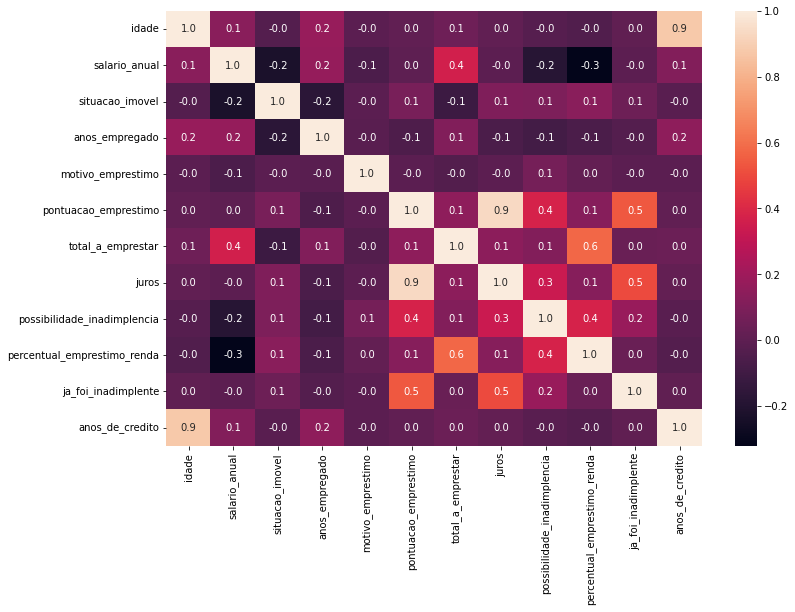

In [70]:
import matplotlib.pyplot as plt

matriz_de_correlacao = dados.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(matriz_de_correlacao,
            annot=True,  
            fmt='.1f') 

## 6.2 Correlação entre as variáveis 'juros' e 'ja_foi_inadimplente'

Através da correlação é possível observar que mutuários que já foram inadimplentes não conseguem juros abaixo de 10%.

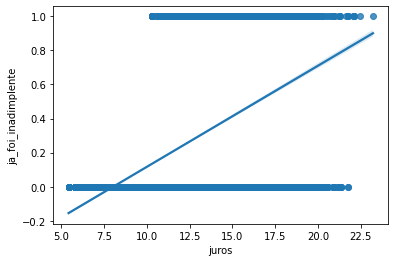

In [71]:
sns.regplot(x=dados["juros"], y=dados["ja_foi_inadimplente"])

## 6.3 Correlação entre as variáveis 'juros' e 'pontuacao_emprestimo'

É possível observar que a pontuação de empréstimo está altamente correlacionada com a taxa de juros. Maiores taxas de juros resultam em uma maior pontuação.

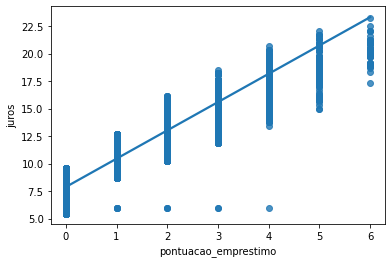

In [72]:
sns.regplot(x=dados["pontuacao_emprestimo"], y=dados["juros"])

## 6.4 Correlação entre as variáveis 'total_a_emprestar' e 'salario_anual'

Como é de se esperar, quanto maior o salário anual do mutuário, maior o valor emprestado.

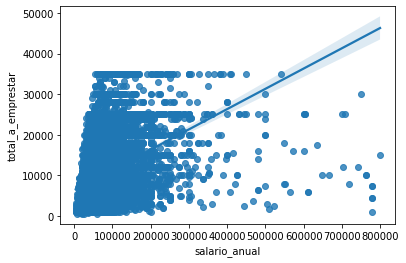

In [73]:
sns.regplot(x=dados["salario_anual"], y=dados["total_a_emprestar"])

# 7. Normalização das features e balanceamento da variável-alvo

Como 82% dos mutuários nunca foram inadimplentes (valor 0 da nossa variável-alvo), será necessário fazer o balanceamento entre as classes 1 e 0 para um melhor aproveitamento do nosso modelo,

## 7.1 Separação das variáveis

Para isso, primeiro separamos as features (x) da variável-alvo (y).

In [74]:
x = dados.drop('ja_foi_inadimplente', axis = 1)
y = dados['ja_foi_inadimplente']

## 7.2 Balanceamento da variável-alvo

Depois, utilizamos uma técnica de oversampling, que cria exemplos sintéticos da classe minoritária na variável-alvo.

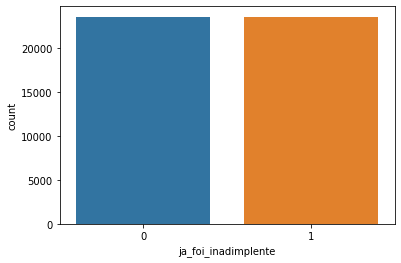

In [75]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
x, y = smote.fit_resample(x, y)
dados_padronizados = pd.concat([x, y], axis=1)
sns.countplot(x='ja_foi_inadimplente', data=dados_padronizados)

## 7.3 Normalização das features

Outro pre-processamento que será feito é a normalização das features, mais adequado para a performance do modelo.

In [76]:
# separação das variaveis com oversampling
x_smt = dados_padronizados.drop('ja_foi_inadimplente', axis=1)
y_smt = dados_padronizados['ja_foi_inadimplente']

# nomalização das features
from sklearn.preprocessing import StandardScaler

normalizador = StandardScaler()
normalizador.fit(x_smt)
x_normalizado = normalizador.transform(x_smt)
x_normalizado

array([[-0.2682554 , -0.33669263, -1.011819  , ..., -0.51893952,
         0.72522353, -0.74311431],
       [-0.96820866, -0.44350254,  0.66506443, ..., -0.51893952,
        -0.58372336, -1.00991846],
       [-0.2682554 ,  1.90934901, -1.011819  , ..., -0.51893952,
        -0.20973853, -1.00991846],
       ...,
       [-0.96820866, -0.20852073, -1.011819  , ..., -0.51893952,
         0.66152065, -0.47631016],
       [ 0.25670954, -0.29396866,  0.66506443, ..., -0.51893952,
        -0.67721956,  0.05489264],
       [-0.44324372, -0.84442084,  0.66506443, ..., -0.51893952,
         0.10422658, -0.07440607]])

# 8. Machine Learning

## 8.1 Estabelecendo baselines e entendendo as métricas

Agora, rodaremos três classificadores diferentes, por hora, sem ajuste de hiperparâmetros: Logistic Regression, Random Forest e Light Gradient Booster Model.

### 8.1.1 Matriz de Confusão

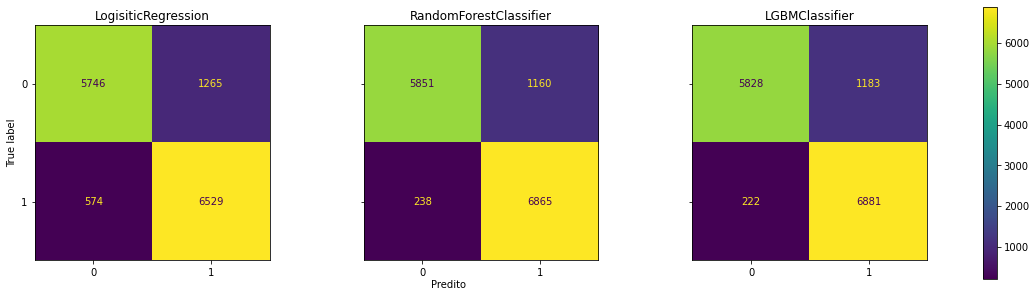

In [77]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

SEED = 0

classificadores = {
    'LogisiticRegression' : LogisticRegression(max_iter=1000,
                                               random_state=SEED),
    'RandomForestClassifier' : RandomForestClassifier(random_state=SEED),
    'LGBMClassifier' : LGBMClassifier(random_state=SEED)
    }

treino_x, teste_x, treino_y, teste_y = train_test_split(x_normalizado, y, 
                                                        test_size = 0.3,
                                                        random_state = SEED)

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for i, (key, classificador) in enumerate(classificadores.items()):
    y_pred = classificador.fit(treino_x, treino_y).predict(teste_x)
    confusao = confusion_matrix(teste_y, y_pred)
    disp = ConfusionMatrixDisplay(confusao)
    disp.plot(ax=axes[i])
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i != 0:
        disp.ax_.set_ylabel('')

fig.text(0.4, 0.1, 'Predito', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

fig.colorbar(disp.im_, ax=axes)

plt.show()

Segundo nosso dicionário de dados, o número 1 representa os mutuários que já foram inadimplentes e, consequentemente, o número 0 representa os mutuários que nunca foram inadimplentes.

O quadrante **superior esquerdo** representa os **verdadeiros positivos**, ou seja, mutuários que foram classificados como adimplentes e realmente são adimplentes.

O quadrante **superior direito** representa os **falsos positivos**, ou seja, mutuários que foram classificados como inadimplentes porém são adimplentes. São os mutuários que, apesar de terem um bom histórico de crédito, terão dificuldade de aprovação. A melhor métrica para avaliar este quadrante é a **precision score**.

O quadrante **inferior esquerdo** representa os **falsos negativos**, ou seja, mutuários que foram classificados como adimplentes porém são inadimplentes. São os mutuários que, apesar de terem um histórico marcado por inadimplência, terão facilidade de aprovação de crédito. A melhor métrica para avaliar este quadrante é o ***recall score***. 

O quadrante **inferior direito** representa os **verdadeiros negativos**, ou seja, mutuários que foram classificados como inadimplentes e realmente são inadimplentes.

Como escolher a melhor métrica?

Depende da estratégia do nosso Banco Digital.

Se o banco busca uma estratégia mais arriscada, concedendo crédito a mais pessoas e, consequentemente, aceitando uma taxa de inadimplência maior, podemos escolher a **precision score**, pois quanto maior a precision, menor é a taxa de falsos positivos, que são as pessoas com bom histórico classificadas como mal pagadores. O revés disso é um aumento na taxa de **falsos negativos**, que são os inadimplentes classificados como bons pagadores.

Caso a estratégia escolhida seja mais conservadora e de menor risco, devemos optar pelo **recall score**. Quanto maior o recall, menor é a taxa de **falsos negativos**, que são as pessoas com histórico de inadimplência classificadas como bons pagadores. Assim como na precision score, o lado negativo desta escolha é um aumento na taxa de  falsos positivos, fazendo com que o banco deixe de conceder crédito à bons pagadores.

Caso a escolha do banco seja moderada, um maior equilíbrio entre estas taxas, devemos escolher a métrica **F1-score**

Accuracy ou acurácia representa o total de acertos do modelo em um único número mais genérico.

Vamos analisar estas métricas no tópico a seguir: 'Classification Report'

### 8.1.2 Accuracy, Precision, Recall e F1-score

A seguir, o código para construção de um dataframe com os resultados das métricas:

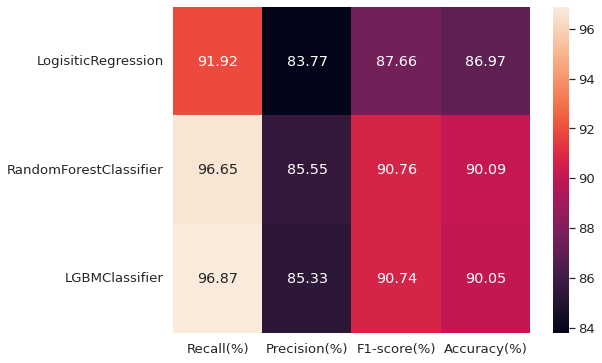

In [78]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns

resultados = []
index = []

for i, (key, classificador) in enumerate(classificadores.items()):

    y_pred = classificador.fit(treino_x, treino_y).predict(teste_x)

    index.append(key)

    resultados.append(
        {
         'Recall(%)' : recall_score(teste_y, y_pred) * 100, 
         'Precision(%)' : precision_score(teste_y, y_pred) * 100,
         'F1-score(%)' : f1_score(teste_y, y_pred) * 100, 
         'Accuracy(%)' : accuracy_score(teste_y, y_pred) * 100 
         }
    )    

df_resultados = pd.DataFrame(resultados, index=index)

plt.figure(figsize = (8, 6))
sns.set(font_scale = 1.2)
sns.heatmap(df_resultados,
            annot=True,
            fmt='.2f')
plt.show()

Sem ajustes de hiperparâmetros, os classificadores RandomForestClassifier e LGBMClassifier parecem alcançar as melhores métricas.

### 8.1.3 Curva ROC e AUC

Para visualizar a curva ROC e sua respectiva AUC vamos utilizar o seguinte gráfico:

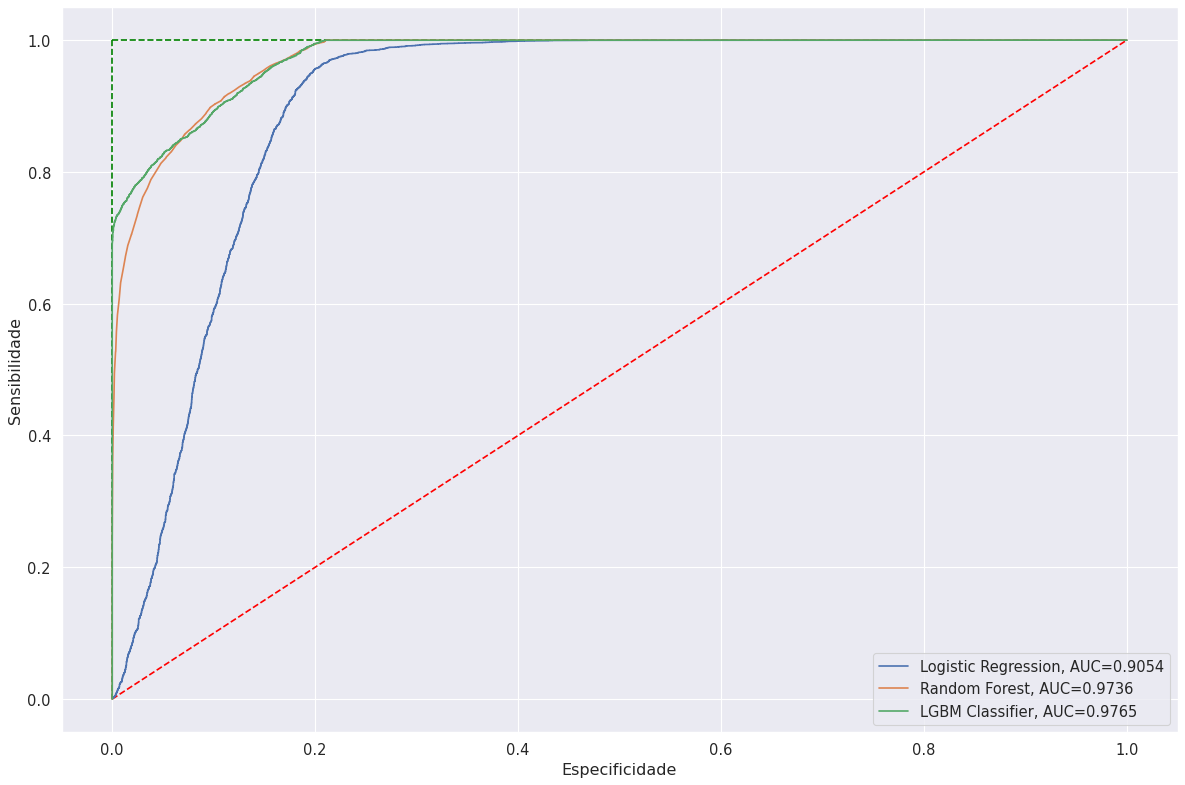

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

#definindo área do gráfico
plt.figure(0, figsize=(18, 12), dpi=80).clf()
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')

#ajustando o modelo LogisticRegression e plotando curva ROC
model = LogisticRegression(max_iter=1000)
model.fit(treino_x, treino_y)
y_pred = model.predict_proba(teste_x)[:, 1]
fpr, tpr, _ = roc_curve(teste_y, y_pred)
auc = round(roc_auc_score(teste_y, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#ajustando o modelo RandomForestClassifier e plotando curva ROC
model = RandomForestClassifier()
model.fit(treino_x, treino_y)
y_pred = model.predict_proba(teste_x)[:, 1]
fpr, tpr, _ = roc_curve(teste_y, y_pred)
auc = round(roc_auc_score(teste_y, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#ajustando o modelo LGBMClassifier e plotando curva ROC
model = LGBMClassifier()
model.fit(treino_x, treino_y)
y_pred = model.predict_proba(teste_x)[:, 1]
fpr, tpr, _ = roc_curve(teste_y, y_pred)
auc = round(roc_auc_score(teste_y, y_pred), 4)
plt.plot(fpr,tpr,label="LGBM Classifier, AUC="+str(auc))

#legenda
plt.legend()

De acordo com a curva ROC e sua AUC, o modelo LogisticRegression apresenta baixa performance em comparação com seus concorrentes.

## 8.2 Função para rodar os modelos

Primeiro criaremos um novo dataframe para coletarmos os resultados dos modelos.

In [80]:
df_modelos = pd.DataFrame(columns=['Modelo',
                                   'Acurácia',
                                   'Precisão',
                                   'Recall',
                                   'F1-score',
                                   'ROC AUC',
                                   'Verdadeiros Adimplentes (VP)',
                                   'Falsos Inadimplentes (FP)',
                                   'Falsos Adimplentes (FN)',
                                   'Verdadeiros Inadimplentes (VN)'])

Para facilitar a exploração dos modelos, utilizaremos a função a seguir, que receberá os dados e o modelo com seus hiperparâmetros e devolverá os scores (acurácia, precisão, recall, f1-score, matriz de confusão e curva ROC com AUC, além de adicionar os resultados obtidos no dataframe df_modelos.

In [81]:
def roda_modelo(dataset, classificador):

  """
    Recebe o modelo juntamente com seus hiperparâmetros e roda contra o dataset
    passado.
    Retorna métricas de acurácia, precisaõ, recall, F1-Score, matriz de confusão
    e curva ROC com AUC.
    Também adiciona resultados ao dataframe dos modelos.
  """

  # feature e variável alvo
  y = dataset['ja_foi_inadimplente']
  x = x_normalizado

  # train test split
  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                          test_size=0.3, 
                                                          random_state = 0)

  print(f'---- Resultados para o classificador {classificador} ----')
  print(f'Treinamos com {len(treino_x)} elementos e testamos com {len(teste_x)} elementos.')
  print('-' * 53)

  # Modelo
  modelo = classificador
  modelo.fit(treino_x, treino_y)
  y_pred = modelo.predict(teste_x)

  # Métricas
  print(f'---- Métricas ----')
  rec = (recall_score(teste_y, y_pred).round(4)) * 100
  prec = (precision_score(teste_y, y_pred).round(4)) * 100
  f1 = (f1_score(teste_y, y_pred).round(4)) * 100
  acc = (accuracy_score(teste_y, y_pred).round(4)) * 100

  print(f'Recall: {rec}%') 
  print(f'Precision: {prec}%') 
  print(f'F1-score: {f1}%') 
  print(f'Accuracy: {acc}%')

  print('---- Curva ROC e AUC ----')
  prob_previsao = modelo.predict_proba(teste_x)[:,1]
  tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
  roc_auc = roc_auc_score(teste_y, prob_previsao).round(4)
  print(f'ROC AUC: {roc_auc}')

  # plotagem da curva ROC
  plt.subplots(1, figsize=(5,5))
  plt.title('Curva ROC')
  plt.plot(tfp, tvp)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.plot([0, 1], ls="--", c = 'red')
  plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
  plt.show()

  # Matriz de Confusão
  matriz_confusao = confusion_matrix(teste_y, y_pred)
  vn, fp, fn, vp = confusion_matrix(teste_y, y_pred).ravel()
  plt.figure(figsize = (5, 5))
  ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
  ax.set(xlabel = "Predição", ylabel = "Real")

  # Adicionando resultados ao dataframe dos modelos
  global df_modelos
  df_modelos = df_modelos.append({'Modelo' : classificador,
                                  'Acurácia' : acc,
                                  'Precisão' : prec,
                                  'Recall' : rec,
                                  'F1-score' : f1,
                                  'ROC AUC' : roc_auc,
                                  'Verdadeiros Adimplentes (VP)' : vp,
                                  'Falsos Inadimplentes (FP)' : fp,
                                  'Falsos Adimplentes (FN)': fn,
                                  'Verdadeiros Inadimplentes (VN)' : vn},
                                 ignore_index=True)

Com a função pronta, rodaremos 3 modelos para adicionar os resultados no dataframe df_modelos:

---- Resultados para o classificador LGBMClassifier(random_state=0) ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 96.87%
Precision: 85.33%
F1-score: 90.74%
Accuracy: 90.05%
---- Curva ROC e AUC ----
ROC AUC: 0.9765


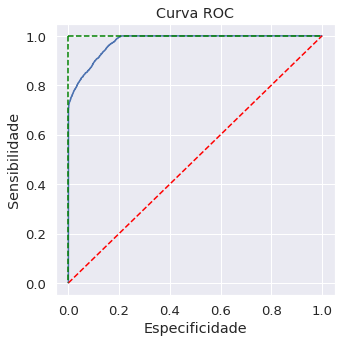

---- Resultados para o classificador RandomForestClassifier(random_state=0) ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 96.65%
Precision: 85.55%
F1-score: 90.75999999999999%
Accuracy: 90.09%
---- Curva ROC e AUC ----
ROC AUC: 0.9736


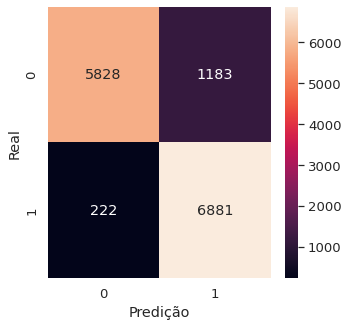

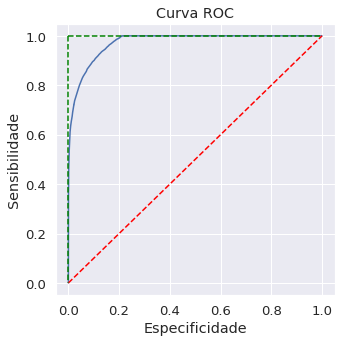

---- Resultados para o classificador LogisticRegression(random_state=0) ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 91.92%
Precision: 83.77%
F1-score: 87.66000000000001%
Accuracy: 86.97%
---- Curva ROC e AUC ----
ROC AUC: 0.9054


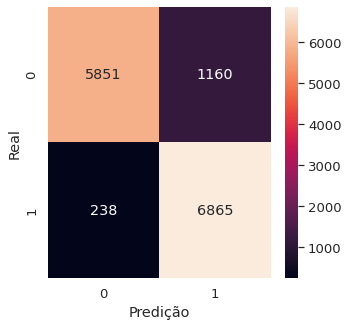

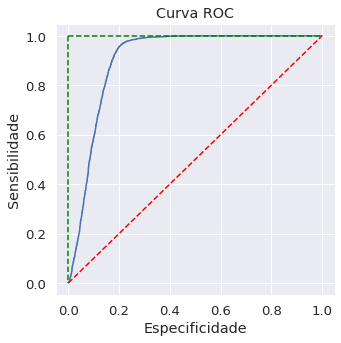

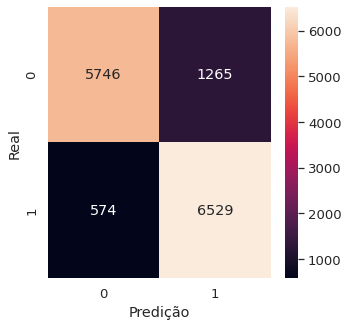

In [82]:
roda_modelo(dados_padronizados, LGBMClassifier(random_state=0))
roda_modelo(dados_padronizados, RandomForestClassifier(random_state=0))
roda_modelo(dados_padronizados, LogisticRegression(random_state=0))

Baselines definidas e adicionadas ao dataframe:

In [83]:
df_modelos

,Modelo,Acurácia,Precisão,Recall,F1-score,ROC AUC,Verdadeiros Adimplentes (VP),Falsos Inadimplentes (FP),Falsos Adimplentes (FN),Verdadeiros Inadimplentes (VN)
0,LGBMClassifier(random_state=0),90.05,85.33,96.87,90.74,0.9765,6881,1183,222,5828
1,"(DecisionTreeClassifier(max_features='auto', r...",90.09,85.55,96.65,90.76,0.9736,6865,1160,238,5851
2,LogisticRegression(random_state=0),86.97,83.77,91.92,87.66,0.9054,6529,1265,574,5746


## 8.3 Validação Cruzada

Para verificar se nosso modelo está com a performance adequada, será realizado a seguir a validação cruzada, com resultados que servirão de parâmetro de avaliação de overfit, underfit além de viés por parte da separação em treino e teste.

### 7.3.1 Importações

In [84]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_validate

### 7.3.2 Função para impressão dos resultados

In [85]:
def imprime_resultado(results):

  """
  Esta função retorna o intervalo dos scores utilizando a validação cruzada.
  """

  # precision
  media_precisao = results['test_precision'].mean()
  std_precisao = results['test_precision'].std()

  precisao_inferior = (media_precisao - 2 * std_precisao) * 100
  precisao_superior = (media_precisao + 2 * std_precisao) * 100

  print(f'Precisao média é de {media_precisao * 100:.2f}%')
  print(f'O intervalo da precisão com cross validation foi entre {precisao_inferior:.2f}% e {precisao_superior:.2f}%')
  
  # recall
  media_recall = results['test_recall'].mean()
  std_recall = results['test_recall'].std()

  recall_inferior = (media_recall - 2 * std_recall) * 100
  recall_superior = (media_recall + 2 * std_recall) * 100

  print(f'Recall médio é de {media_recall * 100:.2f}%')
  print(f'O intervalo do recall com cross validation foi entre {recall_inferior:.2f}% e {recall_superior:.2f}%')

  # f1-score
  media_f1 = results['test_f1_score'].mean()
  std_f1 = results['test_f1_score'].std()

  f1_inferior = (media_f1 - 2 * std_f1) * 100
  f1_superior = (media_f1 + 2 * std_f1) * 100

  print(f'F1-score médio é de {media_f1 * 100:.2f}%')
  print(f'O intervalo do recall com cross validation foi entre {f1_inferior:.2f}% e {f1_superior:.2f}%')

### 7.3.3 Validação cruzada do modelo LGBMClassifier

In [86]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

cv = KFold(n_splits = 10,
           shuffle = True,
           random_state = 0)

modelo = LGBMClassifier(random_state=0)

results = cross_validate(modelo, 
                         x_normalizado, y,
                         cv = cv,
                         return_train_score = False,
                         scoring = scoring)

imprime_resultado(results)

Precisao média é de 84.80%
O intervalo da precisão com cross validation foi entre 83.20% e 86.39%
Recall médio é de 96.69%
O intervalo do recall com cross validation foi entre 95.77% e 97.61%
F1-score médio é de 90.35%
O intervalo do recall com cross validation foi entre 89.35% e 91.35%


### 7.3.4 Validação cruzada do modelo RandomForestClassifier

In [87]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

cv = KFold(n_splits = 10,
           shuffle = True,
           random_state = 0)

modelo = RandomForestClassifier(random_state = 0)

results = cross_validate(modelo, 
                         x_normalizado, y,
                         cv = cv,
                         return_train_score = False,
                         scoring = scoring)

imprime_resultado(results)

Precisao média é de 85.45%
O intervalo da precisão com cross validation foi entre 83.70% e 87.21%
Recall médio é de 96.47%
O intervalo do recall com cross validation foi entre 95.71% e 97.22%
F1-score médio é de 90.63%
O intervalo do recall com cross validation foi entre 89.55% e 91.70%


### 7.3.5 Validação cruzada do modelo LogisticRegression

In [88]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

cv = KFold(n_splits = 10,
           shuffle = True,
           random_state = 0)

modelo = LogisticRegression(max_iter = 10000, 
                            random_state=0)

results = cross_validate(modelo, 
                         x_normalizado, y,
                         cv = cv,
                         return_train_score = False,
                         scoring = scoring)

imprime_resultado(results)

Precisao média é de 83.41%
O intervalo da precisão com cross validation foi entre 81.85% e 84.98%
Recall médio é de 92.66%
O intervalo do recall com cross validation foi entre 91.59% e 93.72%
F1-score médio é de 87.79%
O intervalo do recall com cross validation foi entre 86.86% e 88.72%


## 8.4 Exploração de hiperparâmetros utilizando o Scikit Optimize

Para uma maior eficiência na busca por hiperparâmetros, será utilizado a seguir o pacote Scikit Optimize.

A busca por hiperparâmetros será feita utilizando duas técnicas:

* Dummy Minimize - realiza uma busca através de amostras coletadas aleatóriamente entre limites pré-estabelecidos.
* Otimização Bayesiana - experimenta com amostras de entrada e saída aleatórias e, através de uma função, tenta adivinhar onde será melhor avaliar o próximo ciclo.

### 7.4.1 Instalação do pacote Scikit Optimize

In [89]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 2.3 MB/s 


### 7.4.2 Otimizações para o classificador Random Forest

#### 7.4.2.1 Otimização com algoritimo de busca Dummy Minimize para o classificador Random Forest

##### Código

In [90]:
from sklearn.ensemble import RandomForestClassifier
from skopt import dummy_minimize

def treinar_modelo_rfc(params):

  n_estimators = params[0]
  max_depth = params[1]
  min_samples_split = params[2]
  min_samples_leaf = params[3]
  bootstrap = params[4]
  criterion = params[5]

  print(params, '\n')

  modelo = RandomForestClassifier(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf,
                                  bootstrap = bootstrap,
                                  criterion = criterion,
                                  random_state=0)

  modelo.fit(treino_x, treino_y)

  y_pred = modelo.predict_proba(teste_x)[:,1]

  return roc_auc_score(teste_y, y_pred)

parametros_rfc = [(10, 101),  # n_estimators
                  (3, 8),  # max_depth
                  (16, 129), # min_samples_split
                  (1, 32), # min_samples_leaf
                  (True, False),  # bootstrap
                  ('gini', 'entropy')  # criterion
         ]

resultado_rfc = dummy_minimize(treinar_modelo_rfc,
                               parametros_rfc,
                               random_state = 1,
                               verbose = 1,
                               n_calls = 100)

Iteration No: 1 started. Evaluating function at random point.
[22, 3, 25, 12, False, 'gini'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4539
Function value obtained: 0.9355
Current minimum: 0.9355
Iteration No: 2 started. Evaluating function at random point.
[11, 7, 87, 14, False, 'entropy'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.5250
Function value obtained: 0.9470
Current minimum: 0.9355
Iteration No: 3 started. Evaluating function at random point.
[30, 8, 34, 21, True, 'entropy'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.2361
Function value obtained: 0.9519
Current minimum: 0.9355
Iteration No: 4 started. Evaluating function at random point.
[39, 5, 84, 24, True, 'gini'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.8776
Function value obtained: 0.9447
Current minimum: 0.9355
Iteration No: 5 started. Evaluating function at random point.
[96, 8, 121, 10, False, 'gini'

##### Resultados

In [91]:
# n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap, criterion
resultado_rfc.x

[10, 3, 93, 7, False, 'entropy']

---- Resultados para o classificador RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=3,
                       min_samples_leaf=7, min_samples_split=93,
                       n_estimators=10, random_state=0) ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 98.58%
Precision: 82.93%
F1-score: 90.08%
Accuracy: 89.07000000000001%
---- Curva ROC e AUC ----
ROC AUC: 0.9314


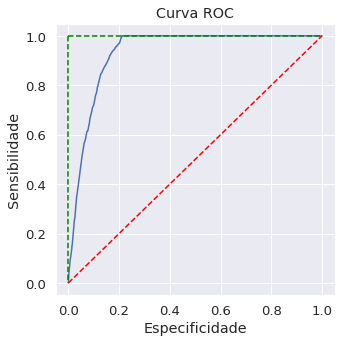

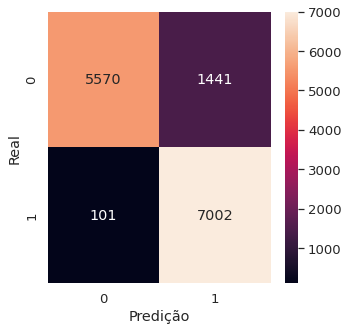

In [92]:
roda_modelo(dados_padronizados, RandomForestClassifier(n_estimators = resultado_rfc.x[0],
                                                       max_depth = resultado_rfc.x[1],
                                                       min_samples_split = resultado_rfc.x[2],
                                                       min_samples_leaf = resultado_rfc.x[3],
                                                       bootstrap = resultado_rfc.x[4],
                                                       criterion = resultado_rfc.x[5],
                                                       random_state=0))

#### 7.4.2.2 Otimização bayesiana do classificador RandomForestClassifier

##### Código

In [93]:
from skopt import gp_minimize

resultados_gp_rfc = gp_minimize(treinar_modelo_rfc,
                                parametros_rfc, 
                                random_state=1, 
                                verbose=1, 
                                n_calls=100, 
                                n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[101, 8, 30, 32, False, 'entropy'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 5.2629
Function value obtained: 0.9515
Current minimum: 0.9515
Iteration No: 2 started. Evaluating function at random point.
[45, 6, 122, 27, False, 'gini'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.8649
Function value obtained: 0.9457
Current minimum: 0.9457
Iteration No: 3 started. Evaluating function at random point.
[50, 4, 76, 29, False, 'entropy'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.9292
Function value obtained: 0.9392
Current minimum: 0.9392
Iteration No: 4 started. Evaluating function at random point.
[95, 7, 97, 26, False, 'gini'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.5529
Function value obtained: 0.9493
Current minimum: 0.9392
Iteration No: 5 started. Evaluating function at random point.
[89, 7, 110, 9, False, 'gi

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 1.2968
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 49 started. Searching for the next optimal point.
[100, 4, 40, 3, True, 'gini'] 

Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 2.8181
Function value obtained: 0.9412
Current minimum: 0.9311
Iteration No: 50 started. Searching for the next optimal point.
[101, 8, 40, 4, True, 'gini'] 

Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 3.9971
Function value obtained: 0.9522
Current minimum: 0.9311
Iteration No: 51 started. Searching for the next optimal point.
[10, 3, 16, 17, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 1.4087
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 52 started. Searching for the next optimal point.
[10, 3, 16, 16, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 1.1300
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 53 started. Searching for the next optimal point.
[21, 4, 56, 28, True, 'gini'] 

Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 1.6155
Function value obtained: 0.9406
Current minimum: 0.9311
Iteration No: 54 started. Searching for the next optimal point.
[89, 3, 121, 2, False, 'entropy'] 

Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 3.1949
Function value obtained: 0.9398
Current minimum: 0.9311
Iteration No: 55 started. Searching for the next optimal point.
[55, 5, 105, 1, True, 'entropy'] 

Iteration No: 55 ended. Search finished for the next optimal point.
Time taken: 2.7445
Function value obtained: 0.9446
Current minimum: 0.9311
Iteration No: 56 started. Searching for the next optimal point.
[10, 3, 129, 19, False, 'gini'] 

Iteration No: 56 ended. Search fini

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 2.1168
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 63 started. Searching for the next optimal point.
[44, 3, 126, 31, True, 'gini'] 

Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 3.5936
Function value obtained: 0.9395
Current minimum: 0.9311
Iteration No: 64 started. Searching for the next optimal point.
[67, 5, 62, 31, False, 'gini'] 

Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 3.1704
Function value obtained: 0.9426
Current minimum: 0.9311
Iteration No: 65 started. Searching for the next optimal point.
[34, 7, 92, 1, True, 'gini'] 

Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 2.1400
Function value obtained: 0.9487
Current minimum: 0.9311
Iteration No: 66 started. Searching for the next optimal point.
[11, 3, 16, 32, False, 'gini'] 

Iteration No: 66 ended. Search finished fo

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 68 ended. Search finished for the next optimal point.
Time taken: 1.4545
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 69 started. Searching for the next optimal point.
[10, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 1.8268
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 70 started. Searching for the next optimal point.
[10, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 1.6036
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 71 started. Searching for the next optimal point.
[11, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 1.8431
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 72 started. Searching for the next optimal point.
[101, 3, 59, 5, True, 'entropy'] 

Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 3.6027
Function value obtained: 0.9410
Current minimum: 0.9311
Iteration No: 73 started. Searching for the next optimal point.
[86, 8, 40, 31, True, 'entropy'] 

Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 4.4653
Function value obtained: 0.9520
Current minimum: 0.9311
Iteration No: 74 started. Searching for the next optimal point.
[11, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 1.7520
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 75 started. Searching for the next optimal point.
[11, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 2.0707
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 76 started. Searching for the next optimal point.
[83, 6, 68, 32, True, 'gini'] 

Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 3.7526
Function value obtained: 0.9475
Current minimum: 0.9311
Iteration No: 77 started. Searching for the next optimal point.
[10, 3, 16, 1, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 1.8041
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 78 started. Searching for the next optimal point.
[10, 3, 16, 19, False, 'gini'] 

Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 1.8098
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 79 started. Searching for the next optimal point.
[33, 7, 27, 31, False, 'entropy'] 

Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 3.0895
Function value obtained: 0.9510
Current minimum: 0.9311
Iteration No: 80 started. Searching for the next optimal point.
[10, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 1.9388
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 81 started. Searching for the next optimal point.
[10, 3, 16, 7, False, 'gini'] 

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 2.0590
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 82 started. Searching for the next optimal point.
[10, 3, 16, 1, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 2.2895
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 83 started. Searching for the next optimal point.
[69, 3, 113, 1, True, 'gini'] 

Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 2.8836
Function value obtained: 0.9409
Current minimum: 0.9311
Iteration No: 84 started. Searching for the next optimal point.
[10, 7, 90, 29, True, 'gini'] 

Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 2.1003
Function value obtained: 0.9471
Current minimum: 0.9311
Iteration No: 85 started. Searching for the next optimal point.
[10, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 1.8589
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 86 started. Searching for the next optimal point.
[11, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 2.1568
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 87 started. Searching for the next optimal point.
[101, 5, 91, 30, True, 'gini'] 

Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 4.1382
Function value obtained: 0.9442
Current minimum: 0.9311
Iteration No: 88 started. Searching for the next optimal point.
[10, 3, 16, 19, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 2.0700
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 89 started. Searching for the next optimal point.
[10, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 2.2781
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 90 started. Searching for the next optimal point.
[11, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 2.1378
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 91 started. Searching for the next optimal point.
[11, 4, 40, 4, True, 'entropy'] 

Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 2.0927
Function value obtained: 0.9393
Current minimum: 0.9311
Iteration No: 92 started. Searching for the next optimal point.
[10, 3, 16, 1, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 2.0754
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 93 started. Searching for the next optimal point.
[10, 3, 16, 19, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 2.1958
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 94 started. Searching for the next optimal point.
[10, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 2.1794
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 95 started. Searching for the next optimal point.
[88, 6, 41, 32, False, 'entropy'] 

Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 5.7174
Function value obtained: 0.9472
Current minimum: 0.9311
Iteration No: 96 started. Searching for the next optimal point.
[22, 8, 80, 27, True, 'entropy'] 

Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 2.8715
Function value obtained: 0.9554
Current minimum: 0.9311
Iteration No: 97 started. Searching for the next optimal point.
[11, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 2.6277
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 98 started. Searching for the next optimal point.
[10, 3, 16, 32, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 2.2739
Function value obtained: 0.9311
Current minimum: 0.9311
Iteration No: 99 started. Searching for the next optimal point.
[85, 3, 110, 2, True, 'gini'] 

Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 3.7248
Function value obtained: 0.9406
Current minimum: 0.9311
Iteration No: 100 started. Searching for the next optimal point.
[10, 3, 16, 1, False, 'gini'] 



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 2.5216
Function value obtained: 0.9311
Current minimum: 0.9311


##### Resultados

In [94]:
# n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap, criterion

resultados_gp_rfc.x

[10, 3, 16, 16, False, 'gini']

---- Resultados para o classificador RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=16,
                       min_samples_split=16, n_estimators=10, random_state=0) ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 98.31%
Precision: 82.97%
F1-score: 89.99000000000001%
Accuracy: 89.0%
---- Curva ROC e AUC ----
ROC AUC: 0.9311


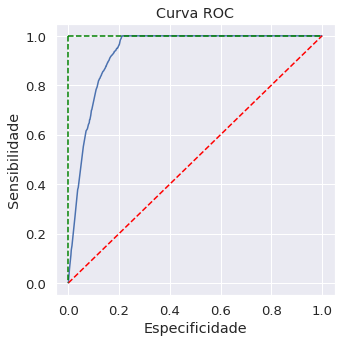

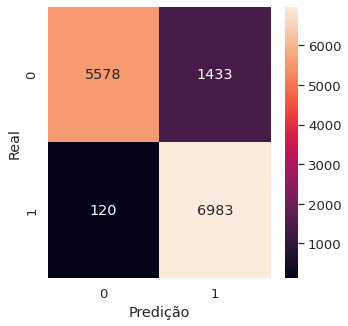

In [95]:
roda_modelo(dados_padronizados, RandomForestClassifier(n_estimators = resultados_gp_rfc.x[0],
                                                       max_depth = resultados_gp_rfc.x[1],
                                                       min_samples_split = resultados_gp_rfc.x[2],
                                                       min_samples_leaf = resultados_gp_rfc.x[3],
                                                       bootstrap = resultados_gp_rfc.x[4],
                                                       criterion = resultados_gp_rfc.x[5],
                                                       random_state=0))

#### 7.4.2.3 Comparativo entre dummy minimize e otimização bayesiana

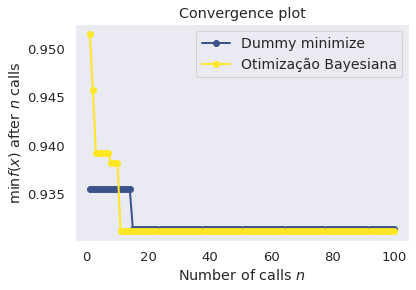

In [96]:
from skopt.plots import plot_convergence
ax = plot_convergence(resultado_rfc, resultados_gp_rfc)
ax.legend(['Dummy minimize', 'Otimização Bayesiana'], loc='upper right', fontsize=14)

### 7.4.3 Otimizações para o classificador LGBMClassifier

#### 7.4.3.1 Otimização com algoritimo de busca Dummy Minimize para o classificador LGBMCLassifier

##### Código

In [97]:
from lightgbm import LGBMClassifier
from skopt import dummy_minimize

def treinar_modelo_lgbm(params):
  
  learning_rate = params[0]
  num_leaves = params[1]
  min_child_samples = params[2]
  subsample = params[3]
  colsample_bytree = params[4]
  
  print(params, '\n')

  modelo = LGBMClassifier(learning_rate = learning_rate,
                          num_leaves = num_leaves,
                          min_child_samples = min_child_samples,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          random_state = 0,
                          subsample_freq = 1,
                          n_estimators = 100)

  modelo.fit(treino_x, treino_y)

  y_pred = modelo.predict_proba(teste_x)[:,1]

  return roc_auc_score(teste_y, y_pred)

parametros_lgbm = [(1e-3, 1e-1, 'log-uniform'),  # learning_rate
                   (2, 128),  # num_leaves
                   (1, 100), # min_child_samples
                   (0.05, 1.0), # subsample
                   (0.1, 1.0),  # colsample_bytree
         ]

resultado_lgbm = dummy_minimize(treinar_modelo_lgbm,
                                parametros_lgbm, 
                                random_state = 1, 
                                verbose = 1,
                                n_calls = 100)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 74, 10, 0.3372159440002478, 0.23208030173540176] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.6733
Function value obtained: 0.9768
Current minimum: 0.9768
Iteration No: 2 started. Evaluating function at random point.
[0.001529949829431263, 78, 72, 0.3782826906908954, 0.457090726807603] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.7989
Function value obtained: 0.9732
Current minimum: 0.9732
Iteration No: 3 started. Evaluating function at random point.
[0.01195730942971637, 128, 19, 0.5483207515942279, 0.49910760440160107] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.8031
Function value obtained: 0.9772
Current minimum: 0.9732
Iteration No: 4 started. Evaluating function at random point.
[0.0028784217488024557, 16, 51, 0.9182639233502714, 0.5114843271882895] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken

##### Resultados

In [98]:
#  [learning_rate, num_leaves, min_child_samples, subsample, colsample_bytree]
resultado_lgbm.x

[0.009685436253688836, 2, 78, 0.09307844214592059, 0.225969507272543]

---- Resultados para o classificador LGBMClassifier(colsample_bytree=0.225969507272543,
               learning_rate=0.009685436253688836, min_child_samples=78,
               num_leaves=2, random_state=0, subsample=0.09307844214592059) ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 98.52%
Precision: 82.97%
F1-score: 90.08%
Accuracy: 89.08%
---- Curva ROC e AUC ----
ROC AUC: 0.9248


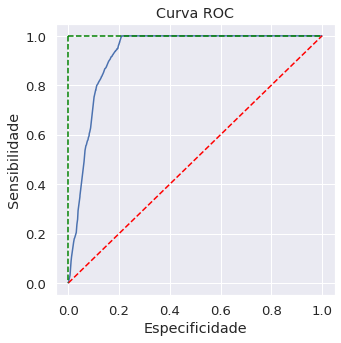

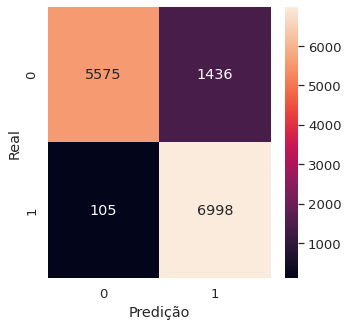

In [99]:
roda_modelo(dados_padronizados, LGBMClassifier(learning_rate = resultado_lgbm.x[0],
                                               num_leaves = resultado_lgbm.x[1],
                                               min_child_samples = resultado_lgbm.x[2],
                                               subsample = resultado_lgbm.x[3],
                                               colsample_bytree = resultado_lgbm.x[4],
                                               random_state = 0))

#### 7.4.3.2 Otimização bayesiana do classificador LGBMClassifier

##### Código

In [100]:
from skopt import gp_minimize

resultados_gp_lgbm = gp_minimize(treinar_modelo_lgbm,
                                 parametros_lgbm, 
                                 random_state=1, 
                                 verbose=1, 
                                 n_calls=100, 
                                 n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.6493
Function value obtained: 0.9781
Current minimum: 0.9781
Iteration No: 2 started. Evaluating function at random point.
[0.006210998932353835, 51, 67, 0.9387621172657304, 0.8616798250174156] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.7130
Function value obtained: 0.9721
Current minimum: 0.9721
Iteration No: 3 started. Evaluating function at random point.
[0.004232013397179603, 68, 45, 0.2680983530433343, 0.5809725180523154] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.6915
Function value obtained: 0.9724
Current minimum: 0.9721
Iteration No: 4 started. Evaluating function at random point.
[0.0672858974212934, 60, 44, 0.9421713999524447, 0.8005503127028804] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 1.7032
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 63 started. Searching for the next optimal point.
[0.0037144454085529855, 2, 71, 0.05, 1.0] 

Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 1.5340
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 64 started. Searching for the next optimal point.
[0.0018549001935109376, 2, 92, 0.7768126489925671, 1.0] 

Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 1.5093
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 65 started. Searching for the next optimal point.
[0.0036334749943431333, 2, 15, 0.13469066228273022, 1.0] 

Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 1.5976
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 66 started. Searching for the next optimal point.
[0.001, 2, 

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 1.5123
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 70 started. Searching for the next optimal point.
[0.002384621899909663, 2, 100, 0.07089463180869265, 1.0] 

Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 1.6549
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 71 started. Searching for the next optimal point.
[0.0012505551953707029, 2, 1, 1.0, 1.0] 

Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 1.6064
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 72 started. Searching for the next optimal point.
[0.0012914509808108052, 2, 1, 0.05, 1.0] 

Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 1.6489
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 73 started. Searching for the next optimal point.
[0.004103839573804564, 2, 10

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 1.9032
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 80 started. Searching for the next optimal point.
[0.0040769461575962266, 2, 1, 0.05, 1.0] 

Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 1.7843
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 81 started. Searching for the next optimal point.
[0.0016282917563642662, 2, 48, 0.6699805156014379, 1.0] 

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 1.9431
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 82 started. Searching for the next optimal point.
[0.001308376264438969, 2, 100, 0.16424004999835157, 1.0] 

Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 2.1207
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 83 started. Searching for the next optimal point.
[0.003171827

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 2.0504
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 91 started. Searching for the next optimal point.
[0.004705611151708023, 2, 96, 0.5727497967586727, 1.0] 

Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 2.3833
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 92 started. Searching for the next optimal point.
[0.0045092146862958085, 2, 1, 0.7594316004603257, 1.0] 

Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 2.3296
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 93 started. Searching for the next optimal point.
[0.003925222150388084, 2, 5, 0.652745557667067, 1.0] 

Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 2.2865
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 94 started. Searching for the next optimal point.
[0.

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 2.2316
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 96 started. Searching for the next optimal point.
[0.003990022078638793, 2, 71, 0.9635017027236356, 1.0] 

Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 2.3843
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 97 started. Searching for the next optimal point.
[0.0012168035689553863, 2, 100, 0.37510476528457537, 1.0] 

Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 2.4139
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 98 started. Searching for the next optimal point.
[0.0039099656458380806, 2, 41, 1.0, 1.0] 

Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 2.3951
Function value obtained: 0.8945
Current minimum: 0.8945
Iteration No: 99 started. Searching for the next optimal point.
[0.001294539

##### Resultados

In [101]:
#  [learning_rate, num_leaves, min_child_samples, subsample, colsample_bytree]

resultados_gp_lgbm.x

[0.001, 2, 100, 1.0, 1.0]

---- Resultados para o classificador LGBMClassifier(learning_rate=0.001, min_child_samples=100, num_leaves=2,
               random_state=0) ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 100.0%
Precision: 82.77%
F1-score: 90.57%
Accuracy: 89.52%
---- Curva ROC e AUC ----
ROC AUC: 0.8945


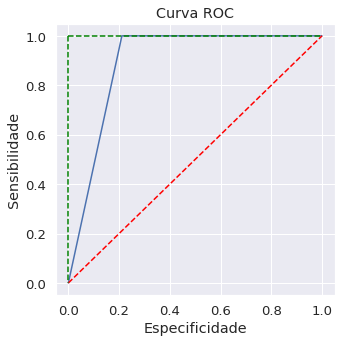

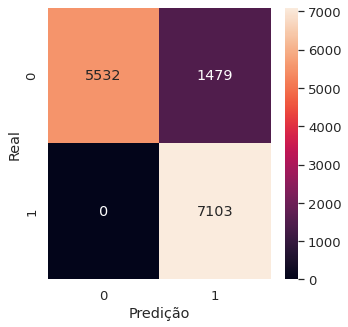

In [102]:
roda_modelo(dados_padronizados, LGBMClassifier(learning_rate = resultados_gp_lgbm.x[0],
                                               num_leaves = resultados_gp_lgbm.x[1],
                                               min_child_samples = resultados_gp_lgbm.x[2],
                                               subsample = resultados_gp_lgbm.x[3],
                                               colsample_bytree = resultados_gp_lgbm.x[4],
                                               random_state = 0))

#### 7.4.3.3 Comparativo entre dummy minimize e otimização bayesiana

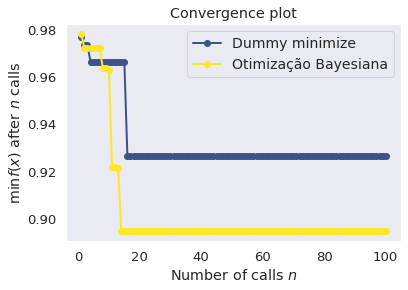

In [103]:
from skopt.plots import plot_convergence
ax = plot_convergence(resultado_lgbm, resultados_gp_lgbm)
ax.legend(['Dummy minimize', 'Otimização Bayesiana'], loc='upper right', fontsize=14)

### 7.4.4 Otimizações para o classificador LogisticRegression

#### 7.4.4.1 Otimização com algoritimo de busca Dummy Minimize para o classificador LogisticRegression

##### Código

In [104]:
from sklearn.linear_model import LogisticRegression
from skopt import dummy_minimize

def treinar_modelo_lr(params):
    
  C = params[0]
  penalty = params[1]
    
  print(params, '\n')

  modelo = LogisticRegression(solver = 'liblinear',
                              penalty = penalty,
                              C = C,
                              max_iter = 10000)

  modelo.fit(treino_x, treino_y)

  y_pred = modelo.predict_proba(teste_x)[:,1]

  return -roc_auc_score(teste_y, y_pred)

parametros_lr = [(1.0, 10.0),  # C
                 ('l1', 'l2')  # penalty
                 ]

resultado_lr = dummy_minimize(treinar_modelo_lr,
                              parametros_lr, 
                              random_state = 1, 
                              verbose = 1,
                              n_calls = 100)

Iteration No: 1 started. Evaluating function at random point.
[9.97466329844982, 'l2'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1038
Function value obtained: -0.9054
Current minimum: -0.9054
Iteration No: 2 started. Evaluating function at random point.
[2.153120031364211, 'l2'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1351
Function value obtained: -0.9054
Current minimum: -0.9054
Iteration No: 3 started. Evaluating function at random point.
[3.1248007925677848, 'l1'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1394
Function value obtained: -0.9054
Current minimum: -0.9054
Iteration No: 4 started. Evaluating function at random point.
[4.491196670458067, 'l2'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1365
Function value obtained: -0.9054
Current minimum: -0.9054
Iteration No: 5 started. Evaluating function at random point.
[9.419851637254288, 'l2'] 

Iteration No: 5 en

##### Resultados

In [105]:
resultado_lr.x

[9.709011357860849, 'l1']

---- Resultados para o classificador LogisticRegression(C=9.709011357860849, max_iter=10000, penalty='l1',
                   random_state=0, solver='liblinear') ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 91.89%
Precision: 83.77%
F1-score: 87.64%
Accuracy: 86.96000000000001%
---- Curva ROC e AUC ----
ROC AUC: 0.9054


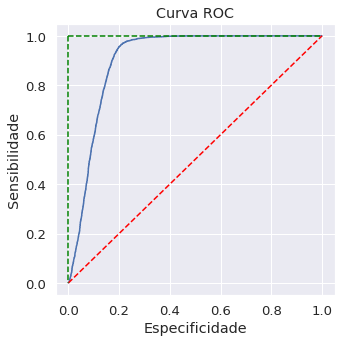

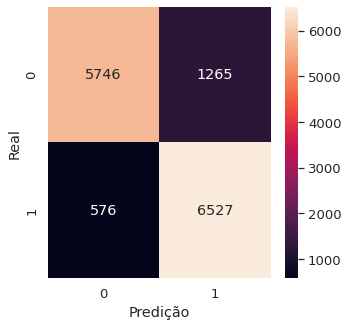

In [106]:
roda_modelo(dados_padronizados, LogisticRegression(solver = 'liblinear',
                                                   C = resultado_lr.x[0],
                                                   penalty = resultado_lr.x[1],
                                                   max_iter = 10000,
                                                   random_state = 0))

#### 7.4.4.2 Otimização bayesiana do classificador LogisticRegression

##### Código

In [107]:
from skopt import gp_minimize

resultados_gp_lr = gp_minimize(treinar_modelo_lr,
                               parametros_lr, 
                               random_state=1, 
                               verbose=1, 
                               n_calls=100, 
                               n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[9.97466329844982, 'l2'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1031
Function value obtained: -0.9054
Current minimum: -0.9054
Iteration No: 2 started. Evaluating function at random point.
[2.153120031364211, 'l2'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1396
Function value obtained: -0.9054
Current minimum: -0.9054
Iteration No: 3 started. Evaluating function at random point.
[3.124800792567785, 'l1'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1449
Function value obtained: -0.9054
Current minimum: -0.9054
Iteration No: 4 started. Evaluating function at random point.
[4.491196670458068, 'l2'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1567
Function value obtained: -0.9054
Current minimum: -0.9054
Iteration No: 5 started. Evaluating function at random point.
[9.419851637254288, 'l2'] 

Iteration No: 5 end

##### Resultados

In [108]:
resultados_gp_lr.x

[7.770395382716955, 'l1']

---- Resultados para o classificador LogisticRegression(C=9.709011357860849, max_iter=10000, penalty='l1',
                   random_state=0, solver='liblinear') ----
Treinamos com 32930 elementos e testamos com 14114 elementos.
-----------------------------------------------------
---- Métricas ----
Recall: 91.89%
Precision: 83.77%
F1-score: 87.64%
Accuracy: 86.96000000000001%
---- Curva ROC e AUC ----
ROC AUC: 0.9054


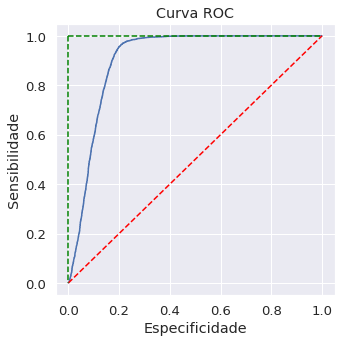

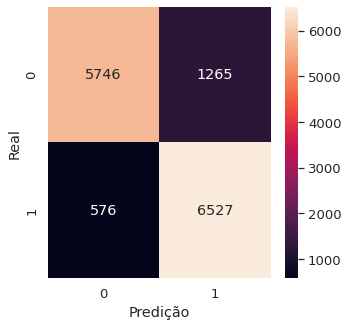

In [109]:
roda_modelo(dados_padronizados, LogisticRegression(solver = 'liblinear',
                                                   C = resultado_lr.x[0],
                                                   penalty = resultado_lr.x[1],
                                                   max_iter = 10000,
                                                   random_state = 0))

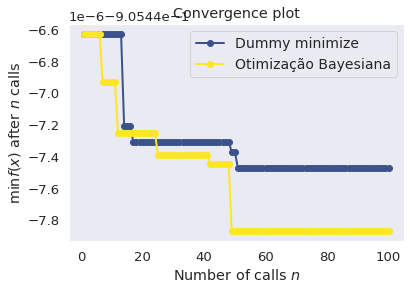

In [110]:
from skopt.plots import plot_convergence

ax = plot_convergence(resultado_lr, resultados_gp_lr)
ax.legend(['Dummy minimize', 'Otimização Bayesiana'], loc='upper right', fontsize=14)

## 8.5 Modelo Final

Aqui temos o dataframe com as métricas necessárias para decidirmos o modelo final.

Com já discutido antes, a decisão do modelo final dependerá de qual estratégia de negócio o banco irá tomar.

In [111]:
df_modelos

,Modelo,Acurácia,Precisão,Recall,F1-score,ROC AUC,Verdadeiros Adimplentes (VP),Falsos Inadimplentes (FP),Falsos Adimplentes (FN),Verdadeiros Inadimplentes (VN)
0,LGBMClassifier(random_state=0),90.05,85.33,96.87,90.74,0.9765,6881,1183,222,5828
1,"(DecisionTreeClassifier(max_features='auto', r...",90.09,85.55,96.65,90.76,0.9736,6865,1160,238,5851
2,LogisticRegression(random_state=0),86.97,83.77,91.92,87.66,0.9054,6529,1265,574,5746
3,"(DecisionTreeClassifier(criterion='entropy', m...",89.07,82.93,98.58,90.08,0.9314,7002,1441,101,5570
4,"(DecisionTreeClassifier(max_depth=3, max_featu...",89.00,82.97,98.31,89.99,0.9311,6983,1433,120,5578
5,LGBMClassifier(colsample_bytree=0.225969507272...,89.08,82.97,98.52,90.08,0.9248,6998,1436,105,5575
6,"LGBMClassifier(learning_rate=0.001, min_child_...",89.52,82.77,100.00,90.57,0.8945,7103,1479,0,5532
7,"LogisticRegression(C=9.709011357860849, max_it...",86.96,83.77,91.89,87.64,0.9054,6527,1265,576,5746
8,"LogisticRegression(C=9.709011357860849, max_it...",86.96,83.77,91.89,87.64,0.9054,6527,1265,576,5746


Neste caso, iremos adotar uma estratégia mais conservadora, utilizando o recall como métrica principal. Recall é o responsável por uma baixa taxa de falsos negativos, que no nosso caso são os falsos adimplentes, mutuários que o modelo classificar como bom pagador e na realidade é um mal pagador.

In [112]:
df_modelos.sort_values('Recall', ascending = False).reset_index(drop=True)

,Modelo,Acurácia,Precisão,Recall,F1-score,ROC AUC,Verdadeiros Adimplentes (VP),Falsos Inadimplentes (FP),Falsos Adimplentes (FN),Verdadeiros Inadimplentes (VN)
0,"LGBMClassifier(learning_rate=0.001, min_child_...",89.52,82.77,100.00,90.57,0.8945,7103,1479,0,5532
1,"(DecisionTreeClassifier(criterion='entropy', m...",89.07,82.93,98.58,90.08,0.9314,7002,1441,101,5570
2,LGBMClassifier(colsample_bytree=0.225969507272...,89.08,82.97,98.52,90.08,0.9248,6998,1436,105,5575
3,"(DecisionTreeClassifier(max_depth=3, max_featu...",89.00,82.97,98.31,89.99,0.9311,6983,1433,120,5578
4,LGBMClassifier(random_state=0),90.05,85.33,96.87,90.74,0.9765,6881,1183,222,5828
5,"(DecisionTreeClassifier(max_features='auto', r...",90.09,85.55,96.65,90.76,0.9736,6865,1160,238,5851
6,LogisticRegression(random_state=0),86.97,83.77,91.92,87.66,0.9054,6529,1265,574,5746
7,"LogisticRegression(C=9.709011357860849, max_it...",86.96,83.77,91.89,87.64,0.9054,6527,1265,576,5746
8,"LogisticRegression(C=9.709011357860849, max_it...",86.96,83.77,91.89,87.64,0.9054,6527,1265,576,5746


E assim, chegamos, finalmente, ao melhor modelo segundo a métrica 'Recall':

In [113]:
melhor_modelo = df_modelos['Modelo'].loc[df_modelos['Recall'].idxmax()]
melhor_modelo

LGBMClassifier(learning_rate=0.001, min_child_samples=100, num_leaves=2,
               random_state=0)

Aqui, treinamos o modelo final com todos os dados, e assim ele estará pronto para exportação:

In [114]:
modelo_final = melhor_modelo
modelo_final.fit(x, y)

LGBMClassifier(learning_rate=0.001, min_child_samples=100, num_leaves=2,
               random_state=0)

## 8.6 Salvando o modelo final

Temos aqui o modelo final, treinado e com seus hiperparâmetros ajustados.

In [115]:
modelo_final

LGBMClassifier(learning_rate=0.001, min_child_samples=100, num_leaves=2,
               random_state=0)

Para exportar o modelo, utilizamos a seguinte biblioteca:

In [116]:
import pickle

e fazemos a exportação:

In [117]:
output = open('modelo_previsao_inadimplencia_alura_cash', 'wb')
pickle.dump(modelo_final, output)
output.close()

# 9. Utilizando o modelo

Para utilizar o modelo em produção, basta preencher as variáveis abaixo que ele irá classificar o mutuário em questão como possível inadimplente (mal pagador) ou possível adimplente (bom pagador).

In [118]:
modelo = open('modelo_previsao_inadimplencia_alura_cash','rb')
modelo_carregado = pickle.load(modelo)
modelo.close()

idade = 45
salario_anual = 800000
situacao_imovel = 2  # Financiado: 0, Alugado: 1, Proprio: 2, Outro: 3
anos_empregado = 10
motivo_emprestimo = 2  # Reformas: 0, Empreender: 1, Educação: 2, Pessoal: 3, Pagamento de dividas: 4, Médico: 5
pontuacao_emprestimo = 3  # A: 0, B: 1, C: 2, D: 3, E: 4, F: 5, G: 6
total_a_emprestar = 10000
juros = 7
possibilidade_inadimplencia = 0
percentual_emprestimo_renda = 0.2  # 0.1 a 0.8
anos_de_credito = 2

entrada = [[idade, salario_anual, situacao_imovel, anos_empregado, motivo_emprestimo, pontuacao_emprestimo, total_a_emprestar, juros, possibilidade_inadimplencia, percentual_emprestimo_renda, anos_de_credito]]

print(f'Este mutuário foi classificado como (1= Possivel Inadimplente; 0= Possivel Adimplente): {modelo_carregado.predict(entrada)[0]}')

Este mutuário foi classificado como (1= Possivel Inadimplente; 0= Possivel Adimplente): 1
